# <font color=blue> COVID-19 IMPACT ON FINANCIAL SECTORS IN THE US

## Project Scope

Our project plan is to create an analysis model to provide insights into the stock market to know how it was affected by the COVID-19 pandemic. The model will help show which financial sectors was hit the most or least.

We focus on the ETF stocks from Vanguard because it comprises the stock indices of each sector. ETF stocks will give us information on how the market performed during the pandemic.

These insights can be used to build a model to determine possible impacts to various market sectors of COVID-19 variants.

### Potential Users

We hope that the project can give us insights into how the COVID-19 pandemic impacts the stock market. With our analysis, the government can develop the right policies to support the economy. Also, business owners can better understand the market to operate their companies.


## Exploratory Data Analysis (EDA)

## Libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.pyplot import gcf
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns
from datetime import datetime
from scipy.optimize import curve_fit
import scipy.stats

From the ETF Vanguard data of the course DSCI 511, we have the total assets for each stock sector. The dataset contains ten sectors: Natural Resources, Consumer Cyclical, Consumer Defensive, Equity Energy, Financial, Technology, Industrials, Real Estate, Communications, Utilities.

We see that Real Estate and Technology have the highest quantity of assets comparing to others. It can imply that these sectors have a strong influence on the market.

In [2]:
#example for 1 ETF
data_ex = pd.read_csv('data/etf/VAW_data.csv')

data_ex.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2019-07-22,128.000000,128.100006,127.250000,127.449997,122.725624,35900,VAW
1,2019-07-23,128.130005,129.839996,128.130005,129.839996,125.027031,48300,VAW
2,2019-07-24,129.380005,130.270004,129.320007,130.270004,125.441086,48300,VAW
3,2019-07-25,129.630005,129.740005,128.300003,129.029999,124.247055,36200,VAW
4,2019-07-26,129.020004,129.440002,128.110001,129.440002,124.641869,29900,VAW


In [3]:
data_ex.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,140.667485,141.707861,139.501489,140.631861,138.298106,1.168124e+05
std,25.204937,25.103402,25.130773,25.120533,26.046377,1.398674e+05
min,84.949997,85.260002,81.099998,81.489998,79.690788,1.550000e+04
25%,124.500000,125.650002,123.750000,124.620003,120.845879,4.730000e+04
50%,132.300003,132.839996,131.509995,132.320007,129.262680,7.620000e+04
75%,160.520004,161.419998,158.250000,160.130005,159.007950,1.415000e+05
max,194.710007,196.000000,192.699997,194.470001,193.741074,1.643700e+06


In [4]:
meta = pd.read_csv('data/etf/meta.csv')
meta.head()

,beta3Year,category,fiveYearAverageReturn,fundFamily,fundInceptionDate,totalAssets,yield,ytdReturn,exchange,exchangeTimezoneName,...,market,messageBoardId,quoteType,shortName,symbol,priceToBook,priceToCashflow,priceToEarnings,priceToSales,dataExtracted
0,Vanguard,Natural Resources,0.1220,Vanguard,2004-01-26,4688025088,0.0146,0.1242,PCX,America/New_York,...,us_market,finmb_22939102,ETF,Vanguard Materials ETF,VAW,3.25,13.37,26.73,2.07,2021-07-22 02:42:16.342479
1,Vanguard,Consumer Cyclical,0.2141,Vanguard,2004-01-26,6947872768,0.0137,0.1416,PCX,America/New_York,...,us_market,finmb_22939068,ETF,Vanguard Consumer Discretion ET,VCR,7.17,15.50,29.66,2.07,2021-07-22 02:42:17.259105
2,Vanguard,Consumer Defensive,0.0804,Vanguard,2004-01-26,6433455104,0.0243,0.0690,PCX,America/New_York,...,us_market,finmb_22939079,ETF,Vanguard Consumer Staples ETF,VDC,5.21,15.34,25.05,1.30,2021-07-22 02:42:18.078453
3,Vanguard,Equity Energy,-0.0364,Vanguard,2004-09-23,6696737792,0.0329,0.3135,PCX,America/New_York,...,us_market,finmb_8815884,ETF,Vanguard Energy ETF,VDE,1.85,11.49,0.00,1.72,2021-07-22 02:42:18.892685
4,Vanguard,Financial,0.1494,Vanguard,2004-01-26,11582452736,0.0175,0.2260,PCX,America/New_York,...,us_market,finmb_22939085,ETF,Vanguard Financials ETF,VFH,1.62,0.00,12.88,2.24,2021-07-22 02:42:19.813491


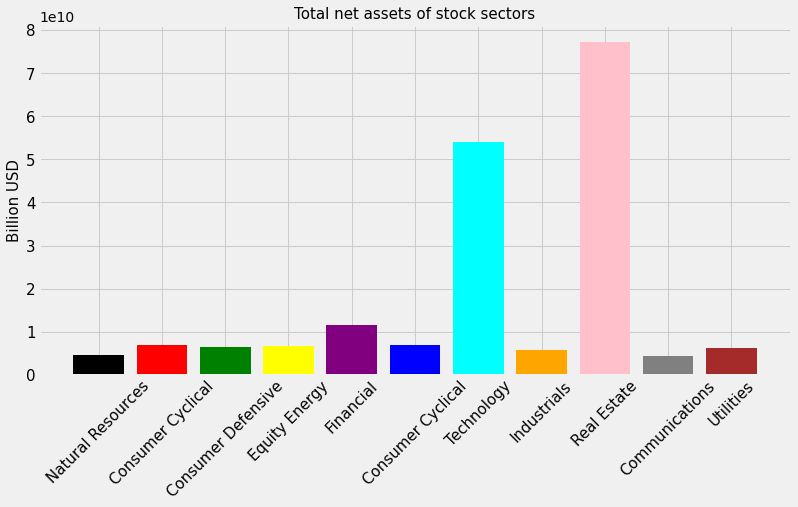

In [5]:
bar_fig = plt.figure(figsize = (12, 6))

df = pd.read_csv("./data/etf/meta.csv")
_  = plt.bar(
    x = range(1, len(df) + 1),
    height = list(df['totalAssets']),
    tick_label = list(df['category']),
    color=['black', 'red', 'green', 'yellow', 'purple', 'blue', 'cyan', 'orange', 'pink', 'grey', 'brown']
)
plt.tick_params(labelsize = 15)
_ = plt.title("Total net assets of stock sectors", fontsize = 15)
_ = plt.ylabel("Billion USD", fontsize = 15)
_ = plt.xticks(rotation = 45)

Firstly, we took a glance at how many indices each sector holds. Even though having the highest total net assets, the Real Estate sector does not have the highest stocks. The Financial sector has the most number of stock indices with nearly 400. This shows that many companies are working on finance. We can also see that the ultilites sector has the smallest number of stock indices.

Next, we want to know the percentage of the net asset of the top 10 most significant holding indices. In the Communications, Equity Energy, Consumer Defensive, Technology, Consumer Cyclical, Utilities sectors, the top 10 companies hold more than a half of the total assets of its industry.

We also want to create a histogram of stock prices of Vanguard Sector ETFs during the pandemic. The stocks plummeted in February 2020 when the pandemic hit. However, most of the stocks recovered well after that, especially in the Technology sector.

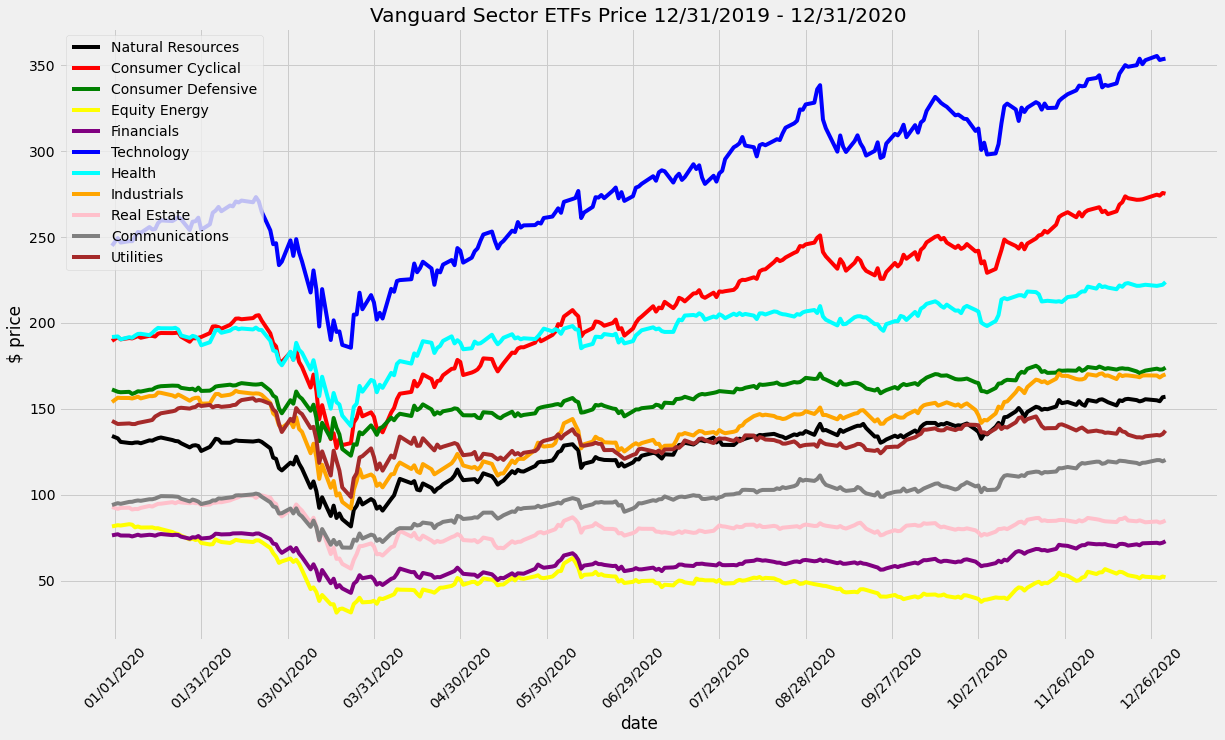

In [6]:
materials = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VAW.csv.xlsx')
con_discretionary = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VCR.csv.xlsx')
con_staples = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VDC.csv.xlsx')
energy = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VDE.csv.xlsx')
financials = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VFH.csv.xlsx')
info_tech = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VGT.csv.xlsx')
health_care = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VHT.csv.xlsx')
industrial = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VIS.csv.xlsx')
real_estate = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VNQ.csv.xlsx')
communication = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VOX.csv.xlsx')
utility = pd.read_excel('data/etf/Download Data - FUND_US_ARCX_VPU.csv.xlsx')

df1 = materials
df2 = con_discretionary
df3 = con_staples
df4 = energy 
df5 = financials 
df6 = info_tech 
df7 = health_care
df8 = industrial
df9 = real_estate
df10 = communication
df11 = utility

plt.plot(df1['Date'], df1['Close'], label="Natural Resources", color="black")
plt.plot(df2['Date'], df2['Close'], label="Consumer Cyclical", color="red")
plt.plot(df3['Date'], df3['Close'], label="Consumer Defensive", color="green")
plt.plot(df4['Date'], df4['Close'], label="Equity Energy", color="yellow")
plt.plot(df5['Date'], df5['Close'], label="Financials", color="purple")
plt.plot(df6['Date'], df6['Close'], label="Technology", color="blue")
plt.plot(df7['Date'], df7['Close'], label="Health", color="cyan")
plt.plot(df8['Date'], df8['Close'], label="Industrials", color="orange")
plt.plot(df9['Date'], df9['Close'], label="Real Estate", color="pink")
plt.plot(df10['Date'], df10['Close'], label="Communications", color="grey")
plt.plot(df11['Date'], df11['Close'], label="Utilities", color="brown")
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("Vanguard Sector ETFs Price 12/31/2019 - 12/31/2020")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

fig = gcf()
fig.set_size_inches(18.5, 10.5)
plt.gca().invert_xaxis()
plt.legend()
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.show()

Lasty, we want to see the histogram of Covid-19 cases in the US. There are 4 waves of Covid-12 since its beginning.

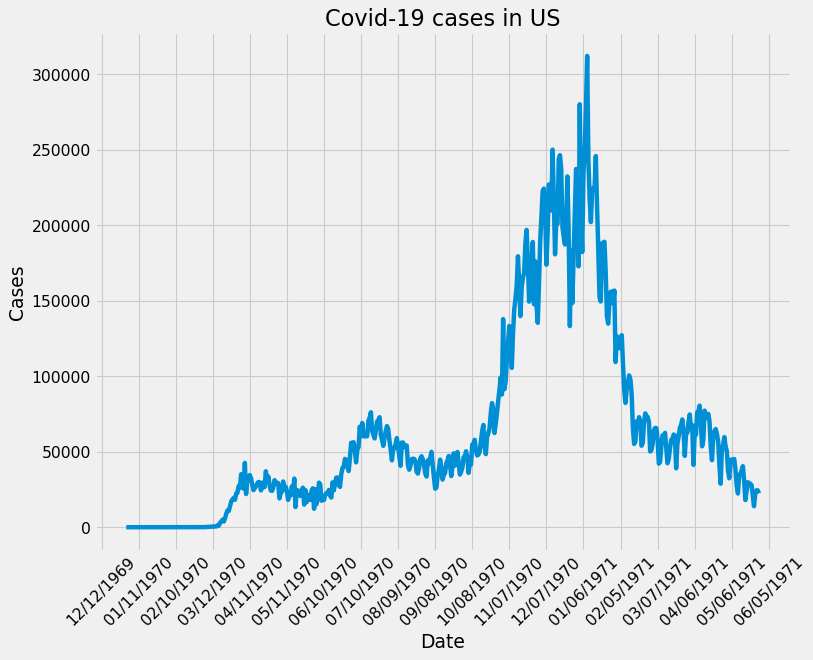

In [7]:
covid_df = pd.read_csv("./data/covid-19/WHO-COVID-19-global-data.csv")
us_covid_df = covid_df[covid_df["Country_code"] == "US"].sort_values(by=["Date_reported"])
   
date = us_covid_df["Date_reported"]
cases = us_covid_df["New_cases"]
  
figure(figsize=(10, 8), dpi=80)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation = 45)
plt.plot(date, cases)
plt.title('Covid-19 cases in US')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

## Analysis Plan

Our data is temporal, so it is important to first determine how COVID-19 impacted the market upon the first lockdown. From there, we can use time series analysis to forecast how a future lockdown for COVID-19 variants could impact the current market. This forecasting can help market experts and individual investors determine how to adjust their stock portfolios prior to a drop in the market, or to plan how to invest should the market decline.

This can also help government agents understand which sectors may need additional support if another pandemic occurs, which can be used to develop a more proactive plan as opposed to reactive.

## Limitation & Future Scope

In order to keep the scope of this project manageable, we utilized Vanguard ETFs to generalize market sector performance. This introduces a small limitation to the accuracy of our dataset. Ideally we would like to expand this to include all stocks (at least in the NYSE) and group them into sectors to get a more accurate representation of each market sector. 

Additionally, we can only assume that any forecasting assumes a number of variables remain constant. With this analysis, we are assuming similar reactions consequences to a COVID outbreak. This is obviously limited because of a number of variables.

Upon completion of our analysis, further investigation as to why certain sectors were hit harder than others should be performed to determine the exact root cause and possible mitigation plans.



# Analysis

### We analyzed the stock data on different waves of covid-19. There are 3 waves that we analyzed

## Analysis on the first wave (03/06/2020 - 04/06/2020)

Firstly, we seperate the data for the first wave from March to April

In [8]:
us_covid_df_first_wave = us_covid_df[(us_covid_df["Date_reported"] >= '2020-03-06') & (us_covid_df["Date_reported"] < '2020-04-07')]

In [9]:
# get the data (stock price, new cases)
def filter_data(us_covid_df, df):
    dates = us_covid_df["Date_reported"]
    cases = us_covid_df["New_cases"]
    
    data = []
    for date, case in zip(dates, cases):
        closing_price = df.loc[df['Date'] == date]["Close"].values
        if (len(closing_price) == 0):
            continue
        data.append({"Close": closing_price[0], "Case": case})

    return pd.DataFrame(data)

By showing the data, we had some idea about how covid-19 affected stock prices.

In [10]:
data_materials = filter_data(us_covid_df_first_wave, df1)
data_con_discretionary = filter_data(us_covid_df_first_wave, df2)
data_con_staples = filter_data(us_covid_df_first_wave, df3)
data_energy = filter_data(us_covid_df_first_wave, df4)
data_financials = filter_data(us_covid_df_first_wave, df5)
data_info_tech = filter_data(us_covid_df_first_wave, df6)
data_health_care = filter_data(us_covid_df_first_wave, df7)
data_industrial = filter_data(us_covid_df_first_wave, df8)
data_real_estate = filter_data(us_covid_df_first_wave, df9)
data_communication = filter_data(us_covid_df_first_wave, df10)
data_utility = filter_data(us_covid_df_first_wave, df11)

data_materials

,Close,Case
0,115.15,44
1,103.96,98
2,107.68,191
3,102.05,301
4,92.28,374
5,98.46,368
6,87.56,536
7,93.59,1381
8,86.39,1055
9,89.02,3108


In [11]:
data_con_discretionary

,Close,Case
0,174.33,44
1,162.33,98
2,169.90,191
3,160.45,301
4,143.90,374
5,152.09,368
6,132.27,536
7,135.72,1381
8,127.14,1055
9,132.38,3108


In [12]:
data_con_staples

,Close,Case
0,155.79,44
1,148.82,98
2,152.37,191
3,144.69,301
4,131.17,374
5,141.81,368
6,132.64,536
7,144.63,1381
8,138.91,1055
9,135.07,3108


In this case, there is a cut threshold (7500 cases) where the closing prices first decreased and then started to increase. We can visualize the data by showing the scatter plot.

In [13]:
def show_scatter_plot(data, color, title):
    scat_fig = plt.figure(figsize = (6, 6))

    _  = plt.scatter(
        data["Close"], data["Case"],
        color = color
    )
    plt.tick_params(labelsize = 15)
    _ = plt.title(title, fontsize = 15)
    _ = plt.ylabel("Case", fontsize = 15)
    _ = plt.xlabel("Close", fontsize = 15)

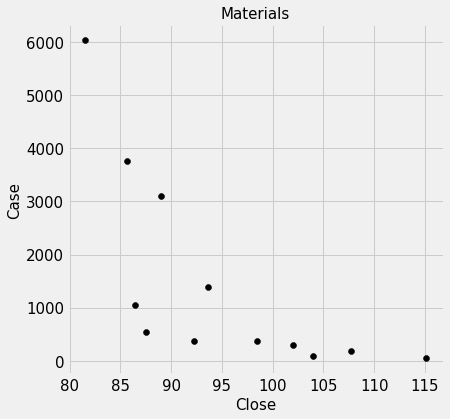

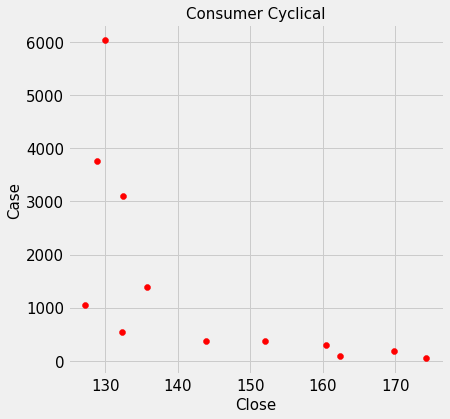

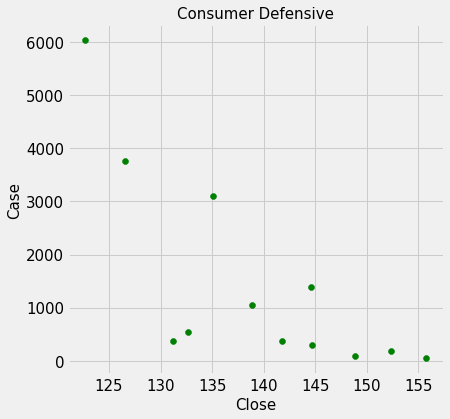

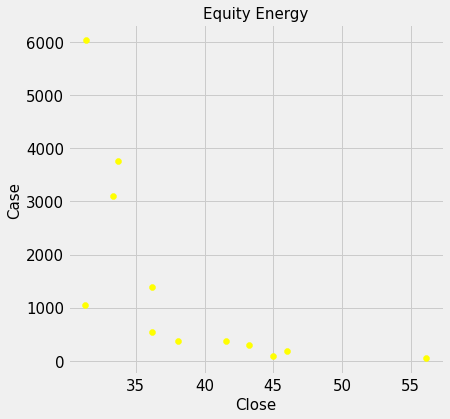

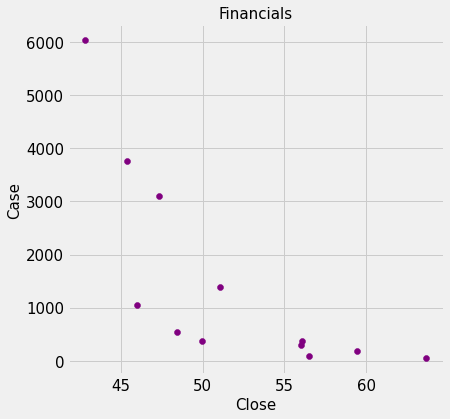

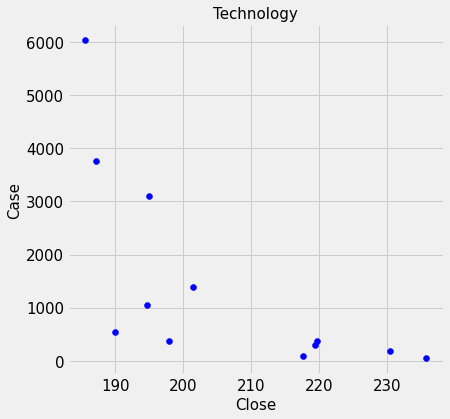

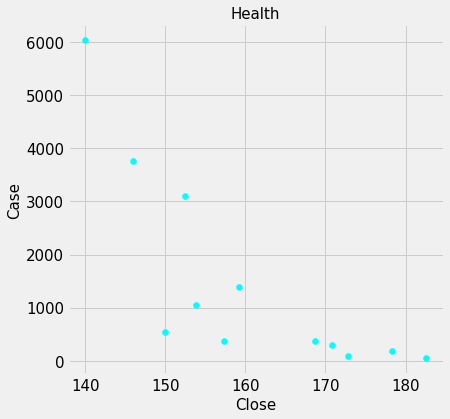

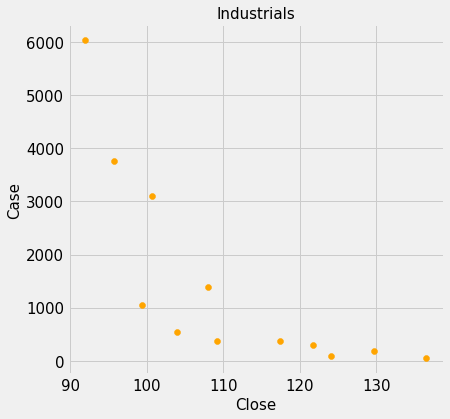

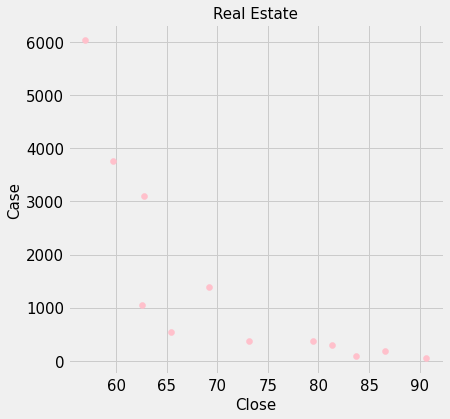

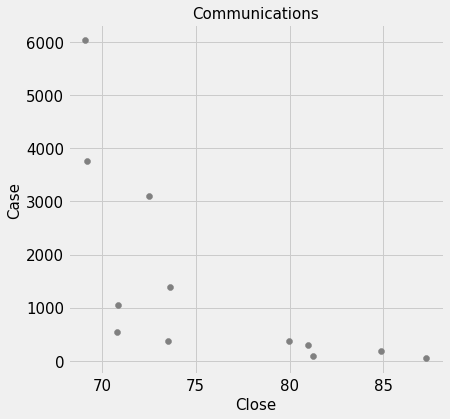

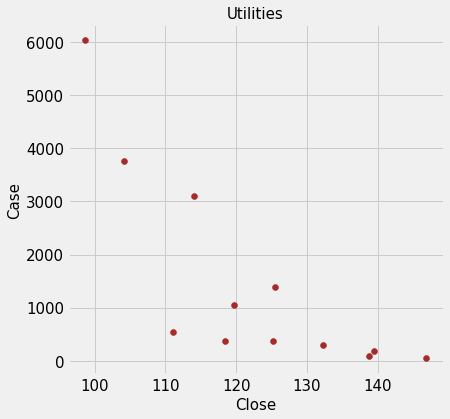

In [14]:
show_scatter_plot(data_materials[data_materials["Case"] < 7500], "black", "Materials")
show_scatter_plot(data_con_discretionary[data_con_discretionary["Case"] < 7500], "red", "Consumer Cyclical")
show_scatter_plot(data_con_staples[data_con_staples["Case"] < 7500], "green", "Consumer Defensive")
show_scatter_plot(data_energy[data_energy["Case"] < 7500], "yellow", "Equity Energy")
show_scatter_plot(data_financials[data_financials["Case"] < 7500], "purple", "Financials")
show_scatter_plot(data_info_tech[data_info_tech["Case"] < 7500], "blue", "Technology")
show_scatter_plot(data_health_care[data_health_care["Case"] < 7500], "cyan", "Health")
show_scatter_plot(data_industrial[data_industrial["Case"] < 7500], "orange", "Industrials")
show_scatter_plot(data_real_estate[data_real_estate["Case"] < 7500], "pink", "Real Estate")
show_scatter_plot(data_communication[data_communication["Case"] < 7500], "grey", "Communications")
show_scatter_plot(data_utility[data_utility["Case"] < 7500], "brown", "Utilities")

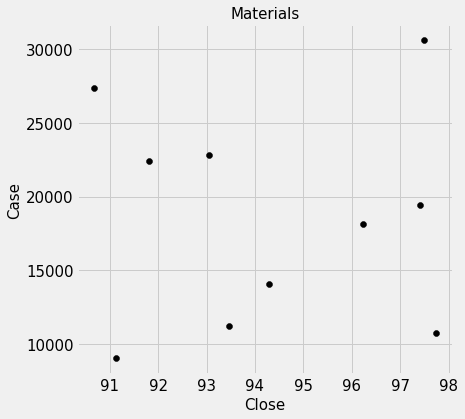

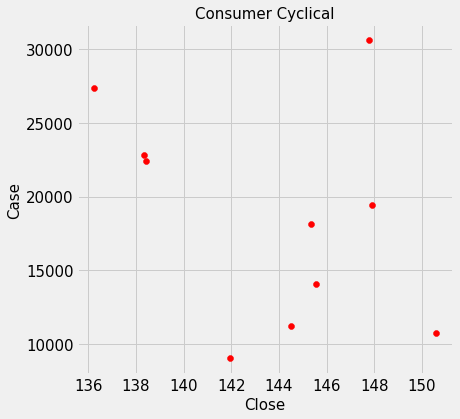

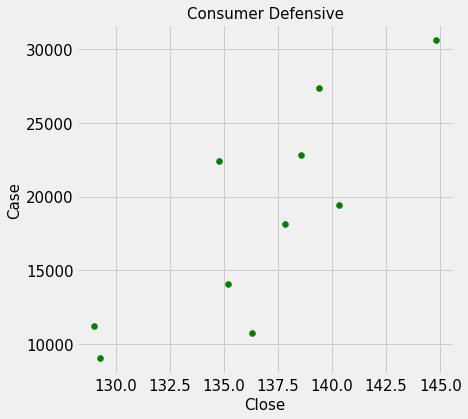

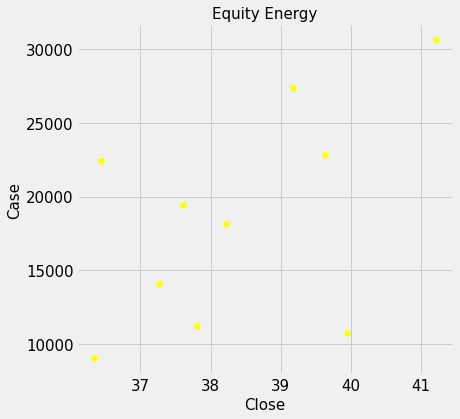

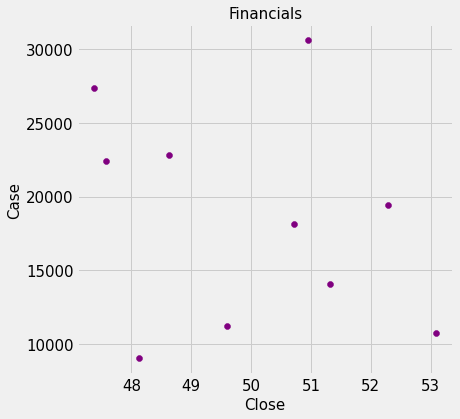

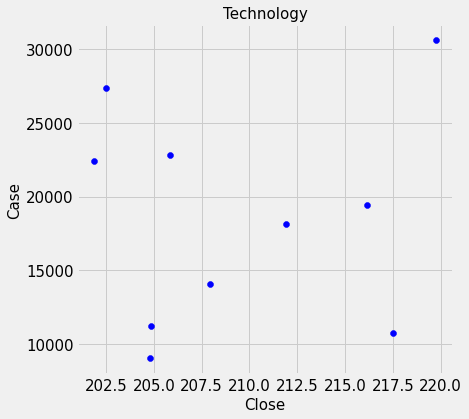

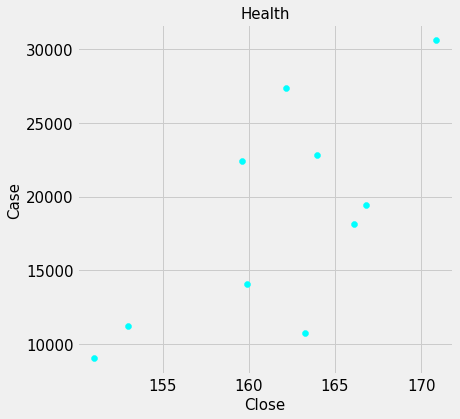

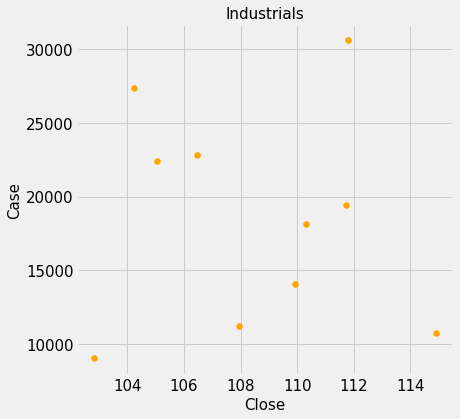

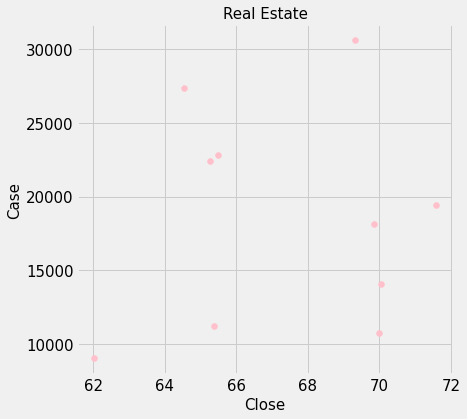

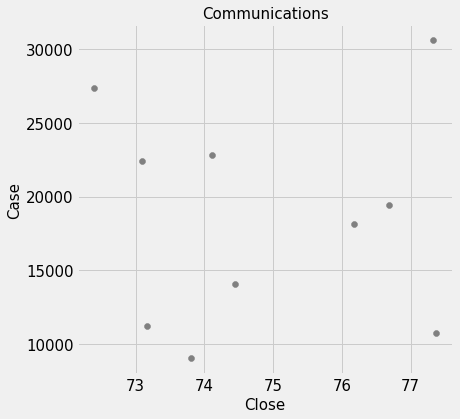

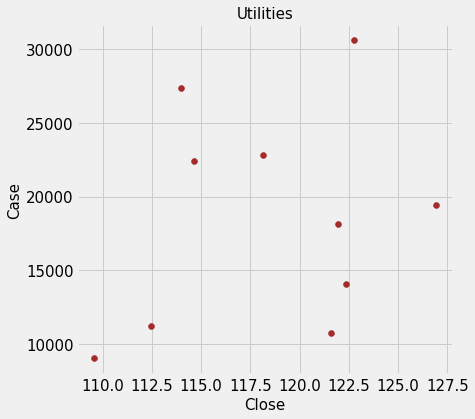

In [15]:
show_scatter_plot(data_materials[data_materials["Case"] >= 7500], "black", "Materials")
show_scatter_plot(data_con_discretionary[data_con_discretionary["Case"] >= 7500], "red", "Consumer Cyclical")
show_scatter_plot(data_con_staples[data_con_staples["Case"] >= 7500], "green", "Consumer Defensive")
show_scatter_plot(data_energy[data_energy["Case"] >= 7500], "yellow", "Equity Energy")
show_scatter_plot(data_financials[data_financials["Case"] >= 7500], "purple", "Financials")
show_scatter_plot(data_info_tech[data_info_tech["Case"] >= 7500], "blue", "Technology")
show_scatter_plot(data_health_care[data_health_care["Case"] >= 7500], "cyan", "Health")
show_scatter_plot(data_industrial[data_industrial["Case"] >= 7500], "orange", "Industrials")
show_scatter_plot(data_real_estate[data_real_estate["Case"] >= 7500], "pink", "Real Estate")
show_scatter_plot(data_communication[data_communication["Case"] >= 7500], "grey", "Communications")
show_scatter_plot(data_utility[data_utility["Case"] >= 7500], "brown", "Utilities")

In [16]:
def get_corr(data):
    data_1 = data[data["Case"] < 7500]
    data_2 = data[data["Case"] >= 7500]
    
    corr_1 = scipy.stats.spearmanr(data_1["Close"], data_1["Case"])
    corr_2 = scipy.stats.spearmanr(data_2["Close"], data_2["Case"])
    return (corr_1, corr_2)

print("\nMaterials:")
corr_mat = get_corr(data_materials)
print(corr_mat[0])
print(corr_mat[1])

print("\nConsumer Cyclical:")
corr_con_cyc = get_corr(data_con_discretionary)
print(corr_con_cyc[0])
print(corr_con_cyc[1])

print("\nConsumer Defensive:")
corr_def = get_corr(data_con_staples)
print(corr_def[0])
print(corr_def[1])

print("\nEnergy:")
corr_energy = get_corr(data_energy)
print(corr_energy[0])
print(corr_energy[1])

print("\nFinancials:")
corr_financials = get_corr(data_financials)
print(corr_financials[0])
print(corr_financials[1])

print("\nTechnology:")
corr_info_tech = get_corr(data_info_tech)
print(corr_info_tech[0])
print(corr_info_tech[1])

print("\nHealthcare:")
corr_health_care = get_corr(data_health_care)
print(corr_health_care[0])
print(corr_health_care[1])

print("\nIndustrials:")
corr_industrial = get_corr(data_industrial)
print(corr_industrial[0])
print(corr_industrial[1])

print("\nReal Estate:")
corr_real_estate = get_corr(data_real_estate)
print(corr_real_estate[0])
print(corr_real_estate[1])

print("\nCommunications:")
corr_communication = get_corr(data_communication)
print(corr_communication[0])
print(corr_communication[1])

print("\nUtilities:")
corr_utility = get_corr(data_utility)
print(corr_utility[0])
print(corr_utility[1])


Materials:
SpearmanrResult(correlation=-0.9160839160839163, pvalue=2.8428045348547105e-05)
SpearmanrResult(correlation=-0.07878787878787878, pvalue=0.8287173946974606)

Consumer Cyclical:
SpearmanrResult(correlation=-0.8811188811188813, pvalue=0.00015267406467669873)
SpearmanrResult(correlation=-0.309090909090909, pvalue=0.3848412302612835)

Consumer Defensive:
SpearmanrResult(correlation=-0.8461538461538463, pvalue=0.000521133700481005)
SpearmanrResult(correlation=0.7454545454545454, pvalue=0.013330146315440047)

Energy:
SpearmanrResult(correlation=-0.9020979020979022, pvalue=5.9978574465377e-05)
SpearmanrResult(correlation=0.4666666666666666, pvalue=0.17393859716506632)

Financials:
SpearmanrResult(correlation=-0.9300699300699302, pvalue=1.170222792865967e-05)
SpearmanrResult(correlation=-0.28484848484848485, pvalue=0.42503815489214547)

Technology:
SpearmanrResult(correlation=-0.8671328671328673, pvalue=0.00025981184986148103)
SpearmanrResult(correlation=0.0303030303030303, pvalue=

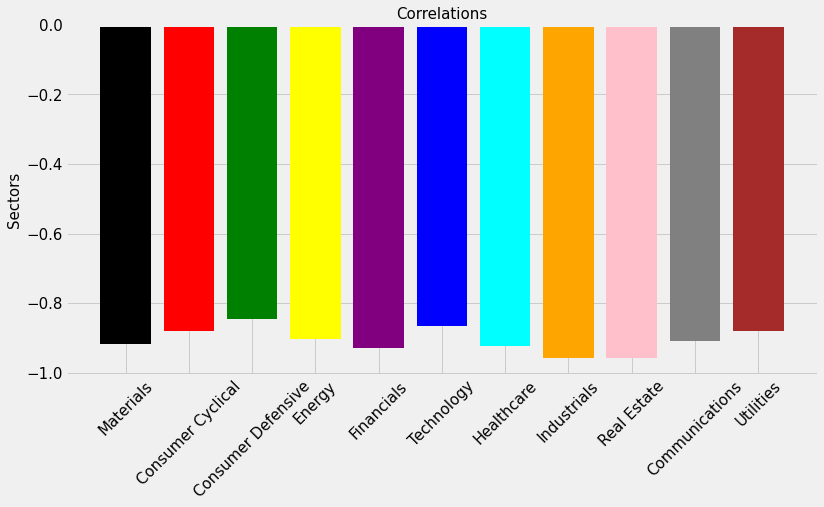

In [17]:
results = {
    "Materials": corr_mat[0].correlation,
    "Consumer Cyclical": corr_con_cyc[0].correlation,
    "Consumer Defensive": corr_def[0].correlation,
    "Energy": corr_energy[0].correlation,
    "Financials": corr_financials[0].correlation,
    "Technology": corr_info_tech[0].correlation,
    "Healthcare": corr_health_care[0].correlation,
    "Industrials": corr_industrial[0].correlation,
    "Real Estate": corr_real_estate[0].correlation,
    "Communications": corr_communication[0].correlation,
    "Utilities": corr_utility[0].correlation,
}
def show_bar_plot(results):
    bar_fig = plt.figure(figsize = (12, 6))
    _  = plt.bar(
        x = range(1, len(results) + 1),
        height = list(results.values()),
        tick_label = list(results.keys()),
        color=['black', 'red', 'green', 'yellow', 'purple', 'blue', 'cyan', 'orange', 'pink', 'grey', 'brown']
    )
    plt.tick_params(labelsize = 15)
    _ = plt.title("Correlations", fontsize = 15)
    _ = plt.ylabel("Sectors", fontsize = 15)
    _ = plt.xticks(rotation = 45)
    
show_bar_plot(results)

The graph above shows that the first wave of Covid-19 hit the **Industrials** and **Real Estate** sectors the most. In contrast, the **Consumer Defensive** was hit the least.

## Analysis on the second wave (06/01/2020 - 07/25/2020)

We worked with he same method for the second wave of Covid-19

In [18]:
us_covid_df_second_wave = us_covid_df[(us_covid_df["Date_reported"] >= '2020-06-01') & (us_covid_df["Date_reported"] < '2020-07-25')]

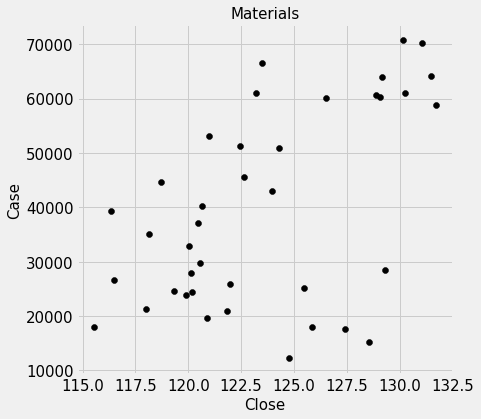

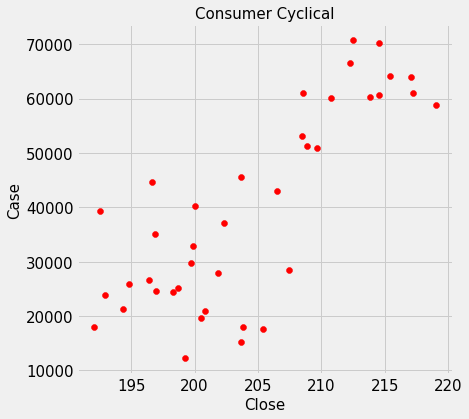

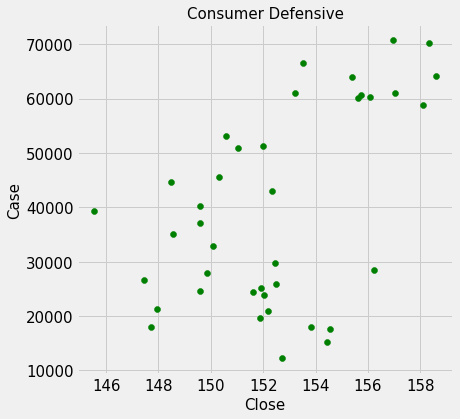

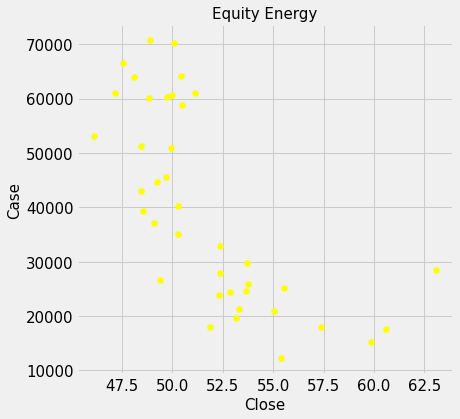

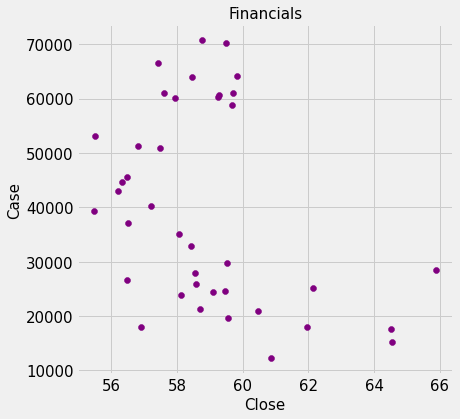

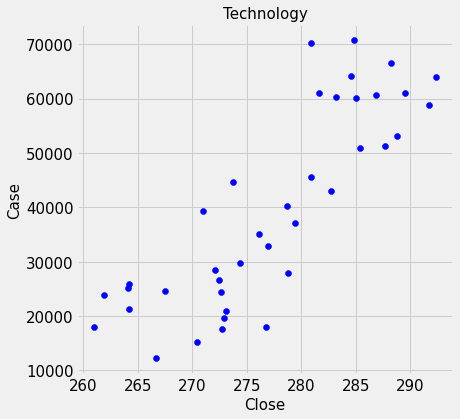

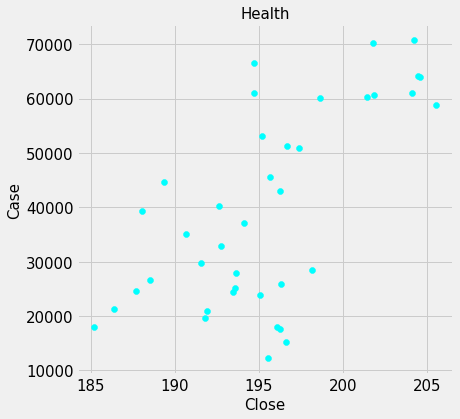

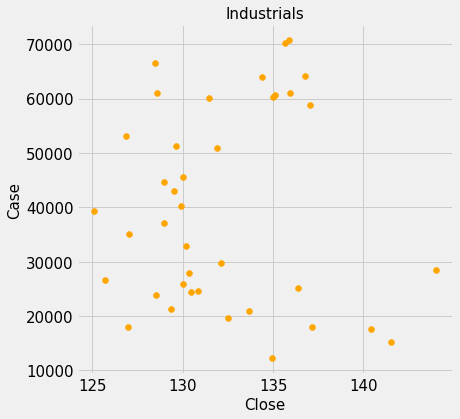

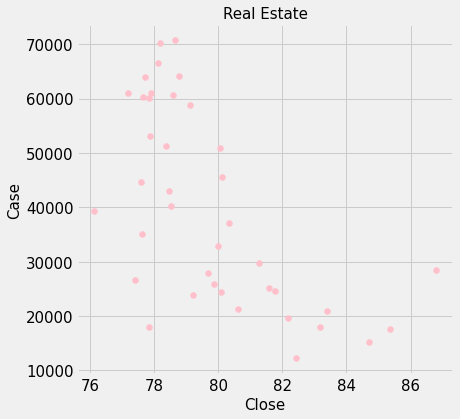

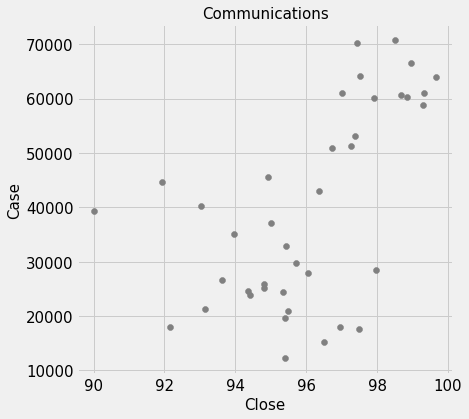

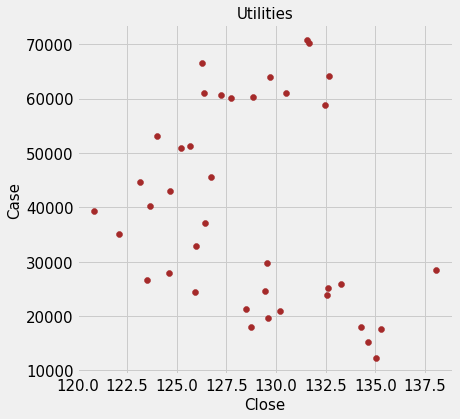

In [19]:
data_materials = filter_data(us_covid_df_second_wave, df1)
data_con_discretionary = filter_data(us_covid_df_second_wave, df2)
data_con_staples = filter_data(us_covid_df_second_wave, df3)
data_energy = filter_data(us_covid_df_second_wave, df4)
data_financials = filter_data(us_covid_df_second_wave, df5)
data_info_tech = filter_data(us_covid_df_second_wave, df6)
data_health_care = filter_data(us_covid_df_second_wave, df7)
data_industrial = filter_data(us_covid_df_second_wave, df8)
data_real_estate = filter_data(us_covid_df_second_wave, df9)
data_communication = filter_data(us_covid_df_second_wave, df10)
data_utility = filter_data(us_covid_df_second_wave, df11)

show_scatter_plot(data_materials, "black", "Materials")
show_scatter_plot(data_con_discretionary, "red", "Consumer Cyclical")
show_scatter_plot(data_con_staples, "green", "Consumer Defensive")
show_scatter_plot(data_energy, "yellow", "Equity Energy")
show_scatter_plot(data_financials, "purple", "Financials")
show_scatter_plot(data_info_tech, "blue", "Technology")
show_scatter_plot(data_health_care, "cyan", "Health")
show_scatter_plot(data_industrial, "orange", "Industrials")
show_scatter_plot(data_real_estate, "pink", "Real Estate")
show_scatter_plot(data_communication, "grey", "Communications")
show_scatter_plot(data_utility, "brown", "Utilities")

By the plots above, we chose the cut off of 40000 cases to calculate the correlations

In [20]:
def get_corr_2(data):
    data_1 = data[data["Case"] < 40000]
    data_2 = data[data["Case"] >= 40000]
    
    corr_1 = scipy.stats.spearmanr(data_1["Close"], data_1["Case"])
    corr_2 = scipy.stats.spearmanr(data_2["Close"], data_2["Case"])
    return (corr_1, corr_2)

print("\nMaterials:")
corr_mat = get_corr_2(data_materials)
print(corr_mat[0])
print(corr_mat[1])

print("\nConsumer Cyclical:")
corr_con_cyc = get_corr_2(data_con_discretionary)
print(corr_con_cyc[0])
print(corr_con_cyc[1])

print("\nConsumer Defensive:")
corr_def = get_corr_2(data_con_staples)
print(corr_def[0])
print(corr_def[1])

print("\nEnergy:")
corr_energy = get_corr_2(data_energy)
print(corr_energy[0])
print(corr_energy[1])

print("\nFinancials:")
corr_financials = get_corr_2(data_financials)
print(corr_financials[0])
print(corr_financials[1])

print("\nTechnology:")
corr_info_tech = get_corr_2(data_info_tech)
print(corr_info_tech[0])
print(corr_info_tech[1])

print("\nHealthcare:")
corr_health_care = get_corr_2(data_health_care)
print(corr_health_care[0])
print(corr_health_care[1])

print("\nIndustrials:")
corr_industrial = get_corr_2(data_industrial)
print(corr_industrial[0])
print(corr_industrial[1])

print("\nReal Estate:")
corr_real_estate = get_corr_2(data_real_estate)
print(corr_real_estate[0])
print(corr_real_estate[1])

print("\nCommunications:")
corr_communication = get_corr_2(data_communication)
print(corr_communication[0])
print(corr_communication[1])

print("\nUtilities:")
corr_utility = get_corr_2(data_utility)
print(corr_utility[0])
print(corr_utility[1])


Materials:
SpearmanrResult(correlation=-0.38571428571428573, pvalue=0.08418819066159448)
SpearmanrResult(correlation=0.6635706914344685, pvalue=0.0026779839744573825)

Consumer Cyclical:
SpearmanrResult(correlation=-0.16753246753246753, pvalue=0.46791573870834513)
SpearmanrResult(correlation=0.7031492934975395, pvalue=0.0011330564508302012)

Consumer Defensive:
SpearmanrResult(correlation=-0.46183828353299755, pvalue=0.035061308977493655)
SpearmanrResult(correlation=0.7647058823529412, pvalue=0.00021879309769392647)

Energy:
SpearmanrResult(correlation=-0.5584415584415584, pvalue=0.008510101872800194)
SpearmanrResult(correlation=0.005159958720330237, pvalue=0.9837879533049654)

Financials:
SpearmanrResult(correlation=-0.5649350649350648, pvalue=0.007621096436507048)
SpearmanrResult(correlation=0.6718266253869969, pvalue=0.0022613045197175117)

Technology:
SpearmanrResult(correlation=0.3818181818181818, pvalue=0.0876405357845381)
SpearmanrResult(correlation=0.3126934984520124, pvalue=0

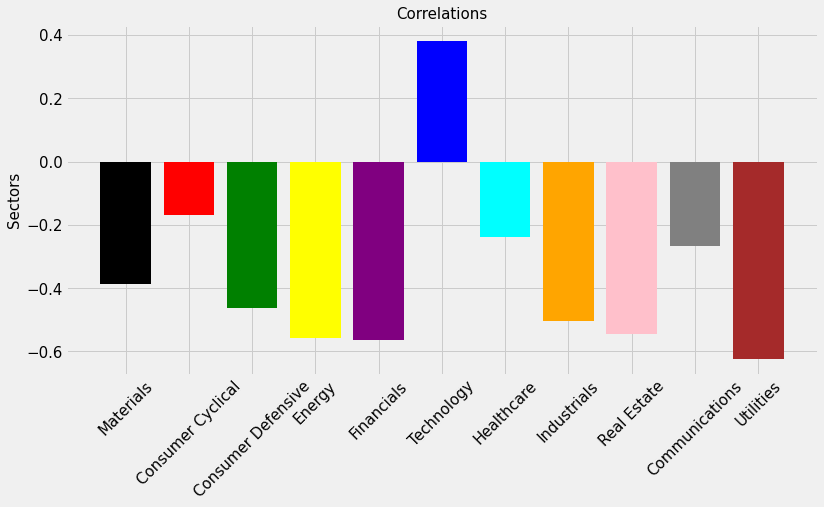

In [21]:
results = {
    "Materials": corr_mat[0].correlation,
    "Consumer Cyclical": corr_con_cyc[0].correlation,
    "Consumer Defensive": corr_def[0].correlation,
    "Energy": corr_energy[0].correlation,
    "Financials": corr_financials[0].correlation,
    "Technology": corr_info_tech[0].correlation,
    "Healthcare": corr_health_care[0].correlation,
    "Industrials": corr_industrial[0].correlation,
    "Real Estate": corr_real_estate[0].correlation,
    "Communications": corr_communication[0].correlation,
    "Utilities": corr_utility[0].correlation,
}
show_bar_plot(results)

On the second wave, we see that the **Technology** still performed well while other sectors were still affected. The most hit this time is the **Utilities** sector. In contrast, the **Consumer Cyclical** is the least hit among the ones with negative correlation.

## Analysis on the third wave (09/01/2020 - 12/31/2020)

We applied the same method for the third wave from September 2020 to the end of the year.

In [22]:
us_covid_df_third_wave = us_covid_df[(us_covid_df["Date_reported"] >= '2020-09-01') & (us_covid_df["Date_reported"] < '2020-12-31')]

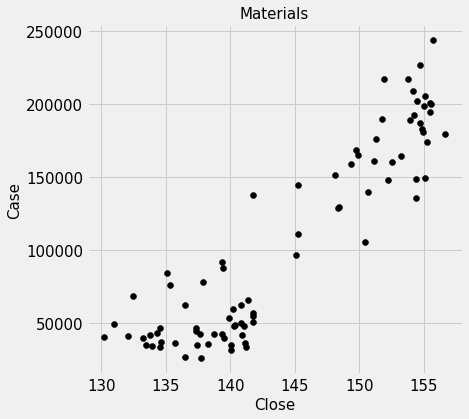

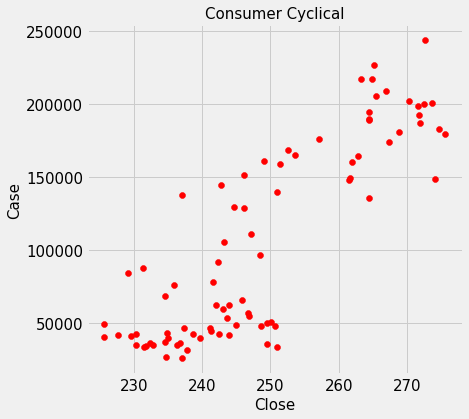

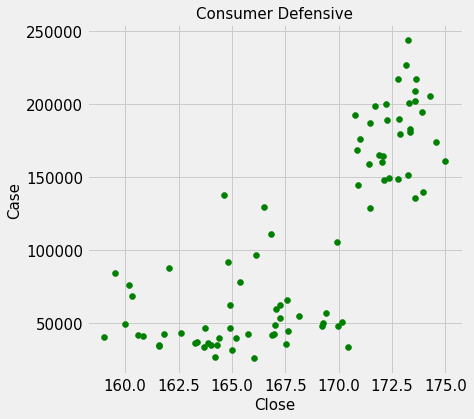

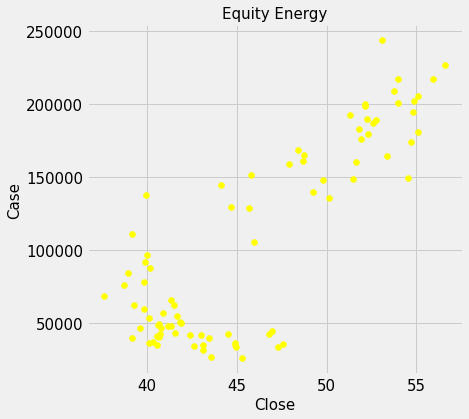

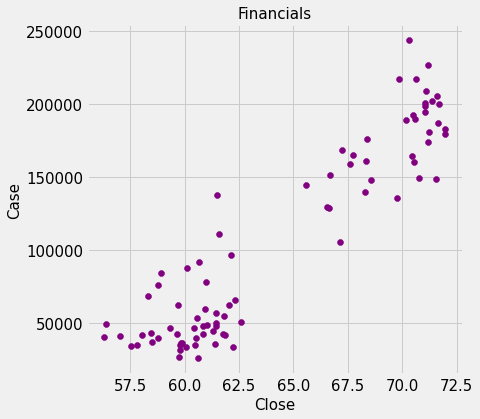

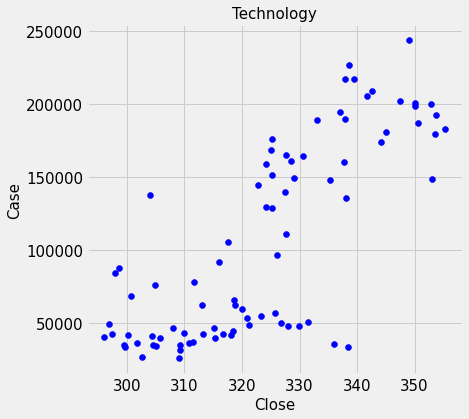

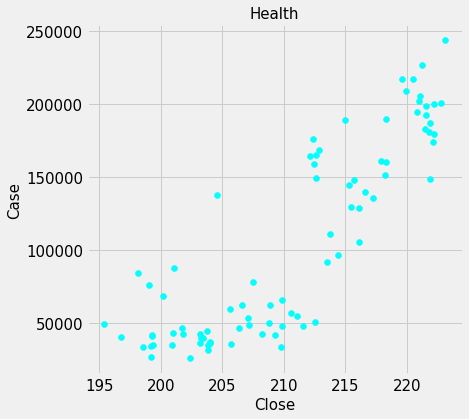

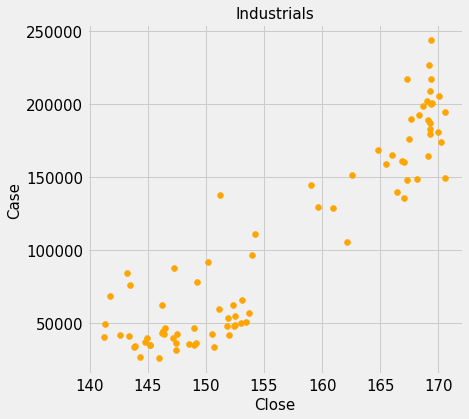

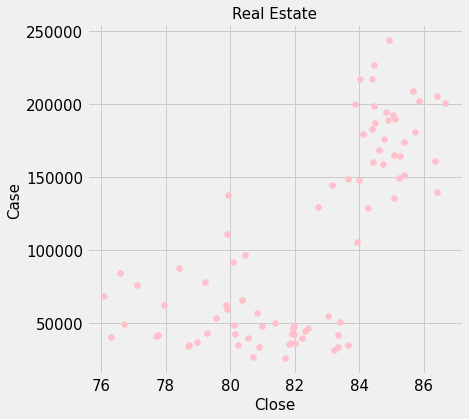

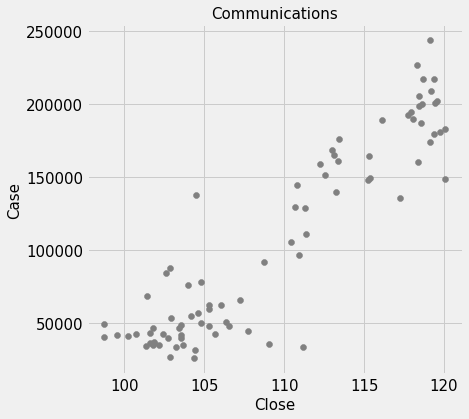

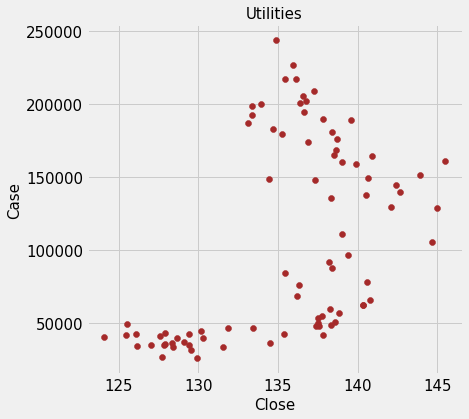

In [23]:
data_materials = filter_data(us_covid_df_third_wave, df1)
data_con_discretionary = filter_data(us_covid_df_third_wave, df2)
data_con_staples = filter_data(us_covid_df_third_wave, df3)
data_energy = filter_data(us_covid_df_third_wave, df4)
data_financials = filter_data(us_covid_df_third_wave, df5)
data_info_tech = filter_data(us_covid_df_third_wave, df6)
data_health_care = filter_data(us_covid_df_third_wave, df7)
data_industrial = filter_data(us_covid_df_third_wave, df8)
data_real_estate = filter_data(us_covid_df_third_wave, df9)
data_communication = filter_data(us_covid_df_third_wave, df10)
data_utility = filter_data(us_covid_df_third_wave, df11)

show_scatter_plot(data_materials, "black", "Materials")
show_scatter_plot(data_con_discretionary, "red", "Consumer Cyclical")
show_scatter_plot(data_con_staples, "green", "Consumer Defensive")
show_scatter_plot(data_energy, "yellow", "Equity Energy")
show_scatter_plot(data_financials, "purple", "Financials")
show_scatter_plot(data_info_tech, "blue", "Technology")
show_scatter_plot(data_health_care, "cyan", "Health")
show_scatter_plot(data_industrial, "orange", "Industrials")
show_scatter_plot(data_real_estate, "pink", "Real Estate")
show_scatter_plot(data_communication, "grey", "Communications")
show_scatter_plot(data_utility, "brown", "Utilities")

In [24]:
def get_corr_3(data):
    data_1 = data[data["Case"] < 75000]
    data_2 = data[data["Case"] >= 75000]
    
    corr_1 = scipy.stats.spearmanr(data_1["Close"], data_1["Case"])
    corr_2 = scipy.stats.spearmanr(data_2["Close"], data_2["Case"])
    return (corr_1, corr_2)

print("\nMaterials:")
corr_mat = get_corr_3(data_materials)
print(corr_mat[0])
print(corr_mat[1])

print("\nConsumer Cyclical:")
corr_con_cyc = get_corr_3(data_con_discretionary)
print(corr_con_cyc[0])
print(corr_con_cyc[1])

print("\nConsumer Defensive:")
corr_def = get_corr_3(data_con_staples)
print(corr_def[0])
print(corr_def[1])

print("\nEnergy:")
corr_energy = get_corr_3(data_energy)
print(corr_energy[0])
print(corr_energy[1])

print("\nFinancials:")
corr_financials = get_corr_3(data_financials)
print(corr_financials[0])
print(corr_financials[1])

print("\nTechnology:")
corr_info_tech = get_corr_3(data_info_tech)
print(corr_info_tech[0])
print(corr_info_tech[1])

print("\nHealthcare:")
corr_health_care = get_corr_3(data_health_care)
print(corr_health_care[0])
print(corr_health_care[1])

print("\nIndustrials:")
corr_industrial = get_corr_3(data_industrial)
print(corr_industrial[0])
print(corr_industrial[1])

print("\nReal Estate:")
corr_real_estate = get_corr_3(data_real_estate)
print(corr_real_estate[0])
print(corr_real_estate[1])

print("\nCommunications:")
corr_communication = get_corr_3(data_communication)
print(corr_communication[0])
print(corr_communication[1])

print("\nUtilities:")
corr_utility = get_corr_3(data_utility)
print(corr_utility[0])
print(corr_utility[1])


Materials:
SpearmanrResult(correlation=0.27973733583489685, pvalue=0.08042878412629535)
SpearmanrResult(correlation=0.7638746965523256, pvalue=1.6208078668499415e-09)

Consumer Cyclical:
SpearmanrResult(correlation=0.4069418386491558, pvalue=0.009161182663144637)
SpearmanrResult(correlation=0.793939393939394, pvalue=1.276982840480014e-10)

Consumer Defensive:
SpearmanrResult(correlation=0.32120075046904323, pvalue=0.04328621588411041)
SpearmanrResult(correlation=0.6418578462059152, pvalue=2.6568429325473294e-06)

Energy:
SpearmanrResult(correlation=-0.5180112570356473, pvalue=0.0006178694206182563)
SpearmanrResult(correlation=0.8598611654797421, pvalue=7.70382021145328e-14)

Financials:
SpearmanrResult(correlation=0.3037523452157599, pvalue=0.05671826251045051)
SpearmanrResult(correlation=0.7688079218275966, pvalue=1.096599449805644e-09)

Technology:
SpearmanrResult(correlation=0.3954971857410882, pvalue=0.011538393246567911)
SpearmanrResult(correlation=0.7486962649753346, pvalue=5.09

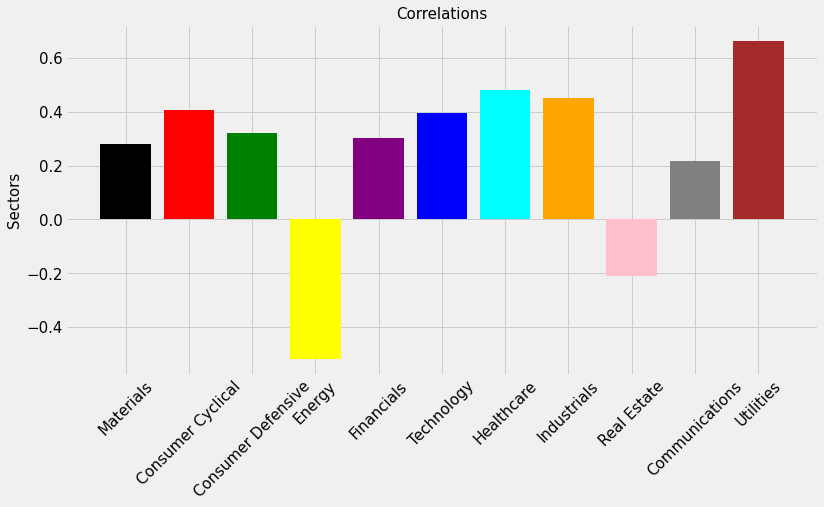

In [25]:
results = {
    "Materials": corr_mat[0].correlation,
    "Consumer Cyclical": corr_con_cyc[0].correlation,
    "Consumer Defensive": corr_def[0].correlation,
    "Energy": corr_energy[0].correlation,
    "Financials": corr_financials[0].correlation,
    "Technology": corr_info_tech[0].correlation,
    "Healthcare": corr_health_care[0].correlation,
    "Industrials": corr_industrial[0].correlation,
    "Real Estate": corr_real_estate[0].correlation,
    "Communications": corr_communication[0].correlation,
    "Utilities": corr_utility[0].correlation,
}
show_bar_plot(results)

This time, we see that most of the stock market sectors performed well during the third wave. However, we still see the **Energy** and **Real Estate** sectors negatively correlated.

## Analysis of Closing Cost vs Cases - Decline in Stock Cost

There was significant evidence that a major decline in stock price occurred at the start of COVID-19. While the stock has rebounded now, it is nevertheless important to understand how each sector of the stock market was impacted as COVID-19 cases increased.

The following analysis focuses on the pattern of stock prices as the total number of cases increased. It focuses on just the fall of stock prices, as we attempt to determine how big of a negative impact COVID-19 had on the stocks at the time.

This analysis could prove useful in the event of another Global Pandemic for determining how sectors will perform during the early stages.

### Combining the Datasets

We first combined the datasets for covid cases with the datasets for each sector stock prices. Masks were applied to ensure we were only looking at days which we had data for both datasets. This included removing dates after to Dec- 2020 as well as removing dates which the stock market was not open and no data for closing price was available

In [26]:
#create and apply mask for removing dates after Dec-2020. For this we will only view dates which we have for both datasets
cov_mask = [dt.datetime.strptime(date, "%Y-%m-%d") <= dt.datetime.strptime("2020-12-31", "%Y-%m-%d") for date in us_covid_df['Date_reported']]
cov_adj = us_covid_df[cov_mask].reset_index() #reset index

#convert date reported from covid data to DateTime object for merging with stock data
cov_adj['Date_reported'] = pd.to_datetime(cov_adj['Date_reported'])
#remove all weekdays from data
weekday_mask = [date in list(materials['Date']) for date in cov_adj['Date_reported']]
#we also remove previous dates that we do not have covid data for
date_mask = [date >= dt.datetime.strptime("2020-01-01", "%Y-%m-%d") for date in materials['Date']]

#apply weekday mask to covid data
cov_2020 = cov_adj[weekday_mask]

#apply other date mask to all stock dataframes
materials = materials[date_mask]
con_discretionary = con_discretionary[date_mask]
con_staples = con_staples[date_mask]
energy = energy[date_mask]
financials = financials[date_mask]
info_tech = info_tech[date_mask]
health_care = health_care[date_mask]
industrial = industrial[date_mask]
real_estate = real_estate[date_mask]
communication = communication[date_mask]
utility = utility[date_mask]

In [27]:
materials.head()

,Date,Open,High,Low,Close,Volume
0,2020-12-31,156.93,157.45,155.50,156.97,62018
1,2020-12-30,155.01,156.87,155.01,156.67,54074
2,2020-12-29,155.78,155.96,153.52,154.36,52646
3,2020-12-28,157.14,157.16,154.89,154.89,54620
4,2020-12-24,155.03,155.52,154.20,155.52,29404


In [28]:
#merge each sector stock data with our covid data

covid_materials = pd.merge(cov_2020, materials, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_con_discretionary = pd.merge(cov_2020, con_discretionary, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_con_staples = pd.merge(cov_2020, con_staples, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_energy = pd.merge(cov_2020, energy, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_financials = pd.merge(cov_2020, financials, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_info_tech = pd.merge(cov_2020, info_tech, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_health_care = pd.merge(cov_2020, health_care, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_industrial = pd.merge(cov_2020, industrial, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_real_estate = pd.merge(cov_2020, real_estate, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_communication = pd.merge(cov_2020, communication, how = "inner", left_on = "Date_reported", right_on = "Date")
covid_utility = pd.merge(cov_2020, utility, how = "inner", left_on = "Date_reported", right_on = "Date")

In [29]:
#example output of merged data
covid_materials

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Open,High,Low,Close,Volume
0,115938,2020-01-03,US,United States of America,AMRO,0,0,0,0,2020-01-03,131.44,132.06,130.69,130.69,80473
1,115941,2020-01-06,US,United States of America,AMRO,0,0,0,0,2020-01-06,130.50,130.91,130.05,130.05,48961
2,115942,2020-01-07,US,United States of America,AMRO,0,0,0,0,2020-01-07,130.03,130.78,129.76,129.95,35369
3,115943,2020-01-08,US,United States of America,AMRO,0,0,0,0,2020-01-08,129.91,130.65,129.50,130.30,50807
4,115944,2020-01-09,US,United States of America,AMRO,0,0,0,0,2020-01-09,130.61,130.72,130.15,130.38,35976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,116294,2020-12-24,US,United States of America,AMRO,200442,18231346,3244,328602,2020-12-24,155.03,155.52,154.20,155.52,29404
248,116298,2020-12-28,US,United States of America,AMRO,183182,18976821,1598,338136,2020-12-28,157.14,157.16,154.89,154.89,54620
249,116299,2020-12-29,US,United States of America,AMRO,148496,19125317,1702,339838,2020-12-29,155.78,155.96,153.52,154.36,52646
250,116300,2020-12-30,US,United States of America,AMRO,179388,19304705,2017,341855,2020-12-30,155.01,156.87,155.01,156.67,54074


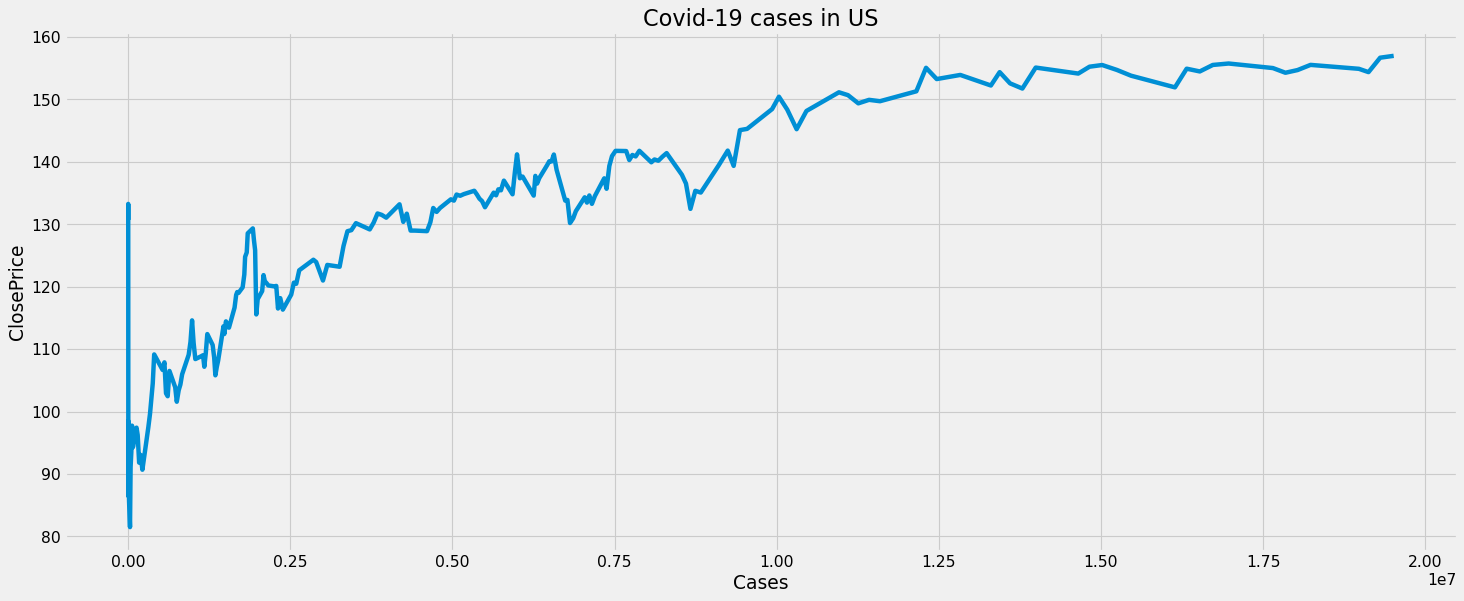

In [30]:
cases = covid_materials["Cumulative_cases"]
close = covid_materials["Close"]
  
figure(figsize=(20, 8), dpi=80)
plt.plot(cases, close)
plt.title('Covid-19 cases in US')
plt.xlabel('Cases')
plt.ylabel('ClosePrice')
plt.show()

In [31]:
#we are only going to look at the decline in price, so we find the minimum price of each sector in our dataframe
#assing the minimum price to a variable

min_close_mat = [close == covid_materials['Close'].min() for close in covid_materials['Close']]
min_close_discretionary = [close == covid_con_discretionary['Close'].min() for close in covid_con_discretionary['Close']]
min_close_staples = [close == covid_con_staples['Close'].min() for close in covid_con_staples['Close']]
min_close_energy = [close == covid_energy['Close'].min() for close in covid_energy['Close']]
min_close_financials = [close == covid_financials['Close'].min() for close in covid_financials['Close']]
min_close_info_tech = [close == covid_info_tech['Close'].min() for close in covid_info_tech['Close']]
min_close_health_care = [close == covid_health_care['Close'].min() for close in covid_health_care['Close']]
min_close_industrial = [close == covid_industrial['Close'].min() for close in covid_industrial['Close']]
min_close_real_estate = [close == covid_real_estate['Close'].min() for close in covid_real_estate['Close']]
min_close_communication = [close == covid_communication['Close'].min() for close in covid_communication['Close']]
min_close_utility = [close == covid_utility['Close'].min() for close in covid_utility['Close']]

#use the minimum price to get the furthest date for each sector we will be looking at
date_of_min_mats = covid_materials[min_close_mat]['Date'].values[0]
date_of_min_discretionary = covid_con_discretionary[min_close_discretionary]['Date'].values[0]
date_of_min_staples = covid_con_staples[min_close_staples]['Date'].values[0]
date_of_min_energy = covid_energy[min_close_energy]['Date'].values[0]
date_of_min_financials = covid_financials[min_close_financials]['Date'].values[0]
date_of_min_info_tech = covid_info_tech[min_close_info_tech]['Date'].values[0]
date_of_min_health_care = covid_health_care[min_close_health_care]['Date'].values[0]
date_of_min_industrial = covid_industrial[min_close_industrial]['Date'].values[0]
date_of_min_real_estate = covid_real_estate[min_close_real_estate]['Date'].values[0]
date_of_min_communication = covid_communication[min_close_communication]['Date'].values[0]
date_of_min_utility = covid_utility[min_close_utility]['Date'].values[0]

#create a mask for the date of minimum closing cost.
min_date_mats = [date < date_of_min_mats for date in covid_materials['Date']]
min_date_discretionary = [date < date_of_min_mats for date in covid_con_discretionary['Date']]
min_date_staples = [date < date_of_min_mats for date in covid_con_staples['Date']]
min_date_energy = [date < date_of_min_mats for date in covid_energy['Date']]
min_date_financials = [date < date_of_min_mats for date in covid_financials['Date']]
min_date_info_tech = [date < date_of_min_mats for date in covid_info_tech['Date']]
min_date_health_care = [date < date_of_min_mats for date in covid_health_care['Date']]
min_date_industrial = [date < date_of_min_mats for date in covid_industrial['Date']]
min_date_real_estate = [date < date_of_min_mats for date in covid_real_estate['Date']]
min_date_communication = [date < date_of_min_mats for date in covid_communication['Date']]
min_date_utility = [date < date_of_min_mats for date in covid_utility['Date']]

#apply mask to our datasets
cov_decl_mats = covid_materials[min_date_mats]
cov_decl_discretionary = covid_con_discretionary[min_date_discretionary]
cov_decl_staples = covid_con_staples[min_date_staples]
cov_decl_energy = covid_energy[min_date_energy]
cov_decl_financials = covid_financials[min_date_financials]
cov_decl_info_tech = covid_info_tech[min_date_info_tech]
cov_decl_health_care = covid_health_care[min_date_health_care]
cov_decl_industrial = covid_industrial[min_date_industrial]
cov_decl_real_estate = covid_real_estate[min_date_real_estate]
cov_decl_communication = covid_communication[min_date_communication]
cov_decl_utility = covid_utility[min_date_utility]

In [32]:
#example dataset after applying mask
cov_decl_energy

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Open,High,Low,Close,Volume
0,115938,2020-01-03,US,United States of America,AMRO,0,0,0,0,2020-01-03,83.27,83.27,81.69,82.01,468836
1,115941,2020-01-06,US,United States of America,AMRO,0,0,0,0,2020-01-06,82.41,83.15,82.09,82.78,780571
2,115942,2020-01-07,US,United States of America,AMRO,0,0,0,0,2020-01-07,82.47,82.66,81.55,82.49,352371
3,115943,2020-01-08,US,United States of America,AMRO,0,0,0,0,2020-01-08,82.49,82.49,80.75,80.95,420061
4,115944,2020-01-09,US,United States of America,AMRO,0,0,0,0,2020-01-09,80.82,81.51,79.86,81.45,482094
5,115945,2020-01-10,US,United States of America,AMRO,0,0,0,0,2020-01-10,81.33,81.37,80.79,80.84,432158
6,115948,2020-01-13,US,United States of America,AMRO,0,0,0,0,2020-01-13,80.80,81.09,80.28,80.88,355160
7,115949,2020-01-14,US,United States of America,AMRO,0,0,0,0,2020-01-14,80.69,81.00,80.20,80.93,492965
8,115950,2020-01-15,US,United States of America,AMRO,0,0,0,0,2020-01-15,80.73,80.76,80.09,80.40,271236
9,115951,2020-01-16,US,United States of America,AMRO,0,0,0,0,2020-01-16,80.68,81.09,80.39,80.44,605707


### Analysis

Taking a brief look at the closing cost vs total cases plotted, we can tell there is some sort of clear negative correlation

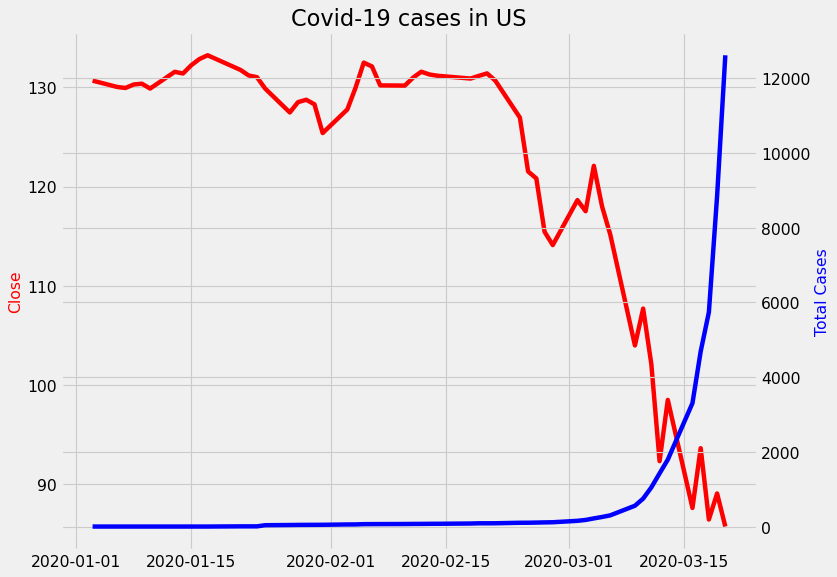

In [33]:
figure(figsize=(10, 8), dpi=80)
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(cov_decl_mats['Date'], cov_decl_mats['Close'], 'r')
ax2.plot(cov_decl_mats['Date'], cov_decl_mats['Cumulative_cases'], 'b')
plt.title('Covid-19 cases in US')
plt.xlabel('Date')
ax.set_ylabel('Close',fontsize=14,color='red')
ax2.set_ylabel('Total Cases',fontsize=14,color='blue')
plt.show()

We plotted the cost as total cases increased and saw what appeared to be an exponential relationship. This quite clearly represents a sort of exponential decay. Note that the decay does not approach 0 as we would typically see in a normal decay formula

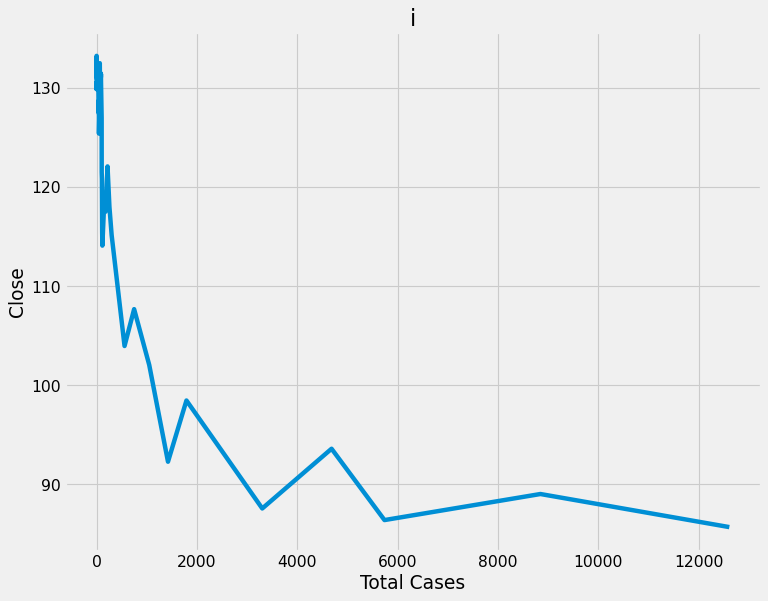

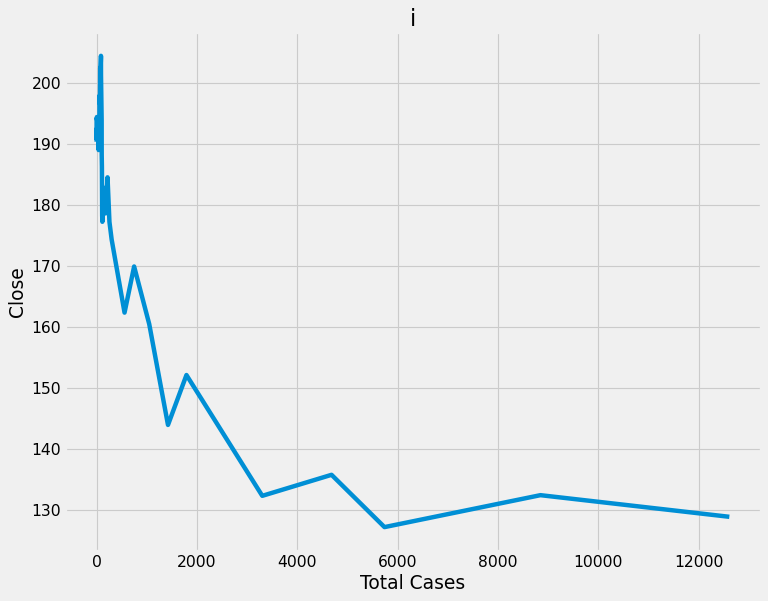

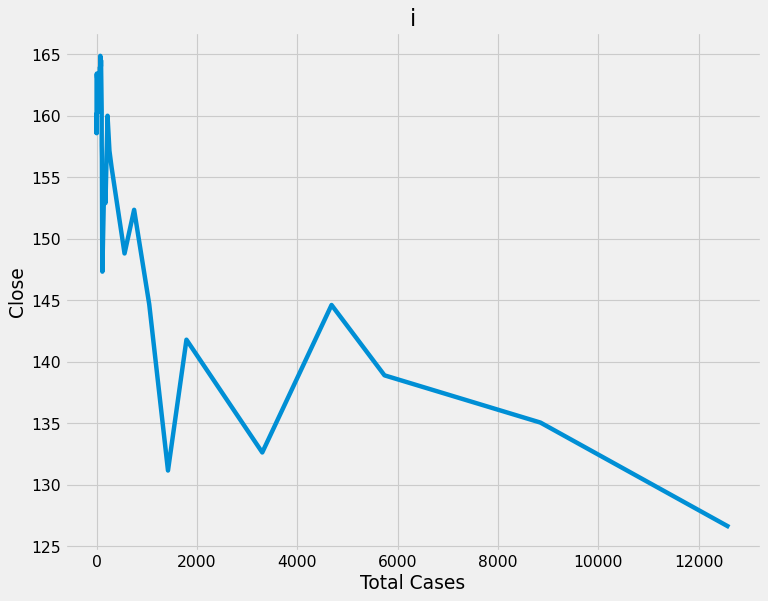

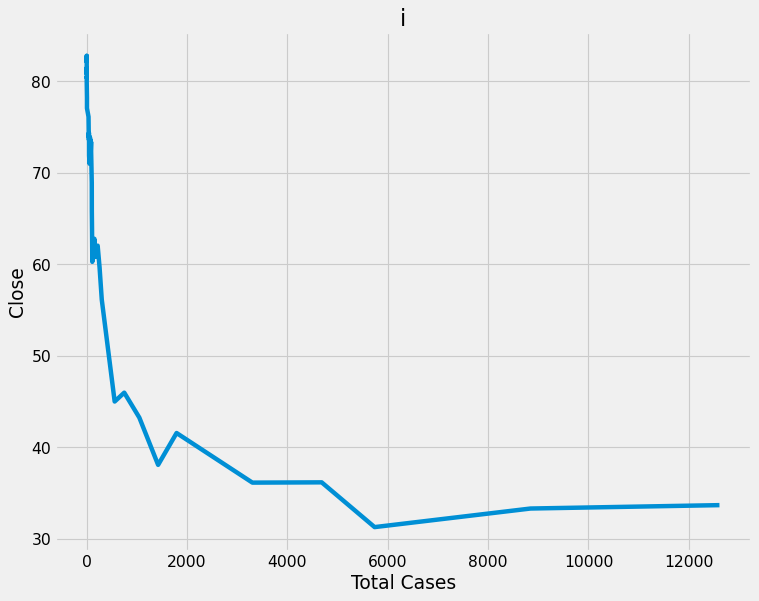

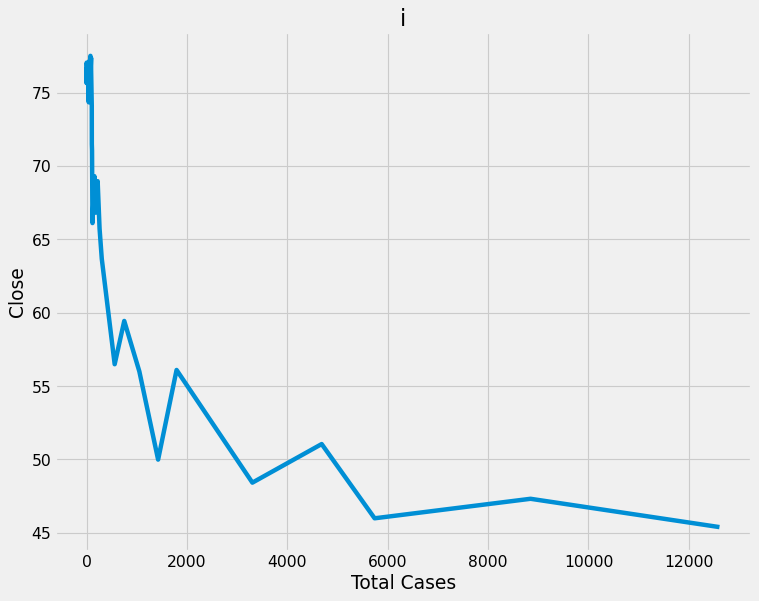

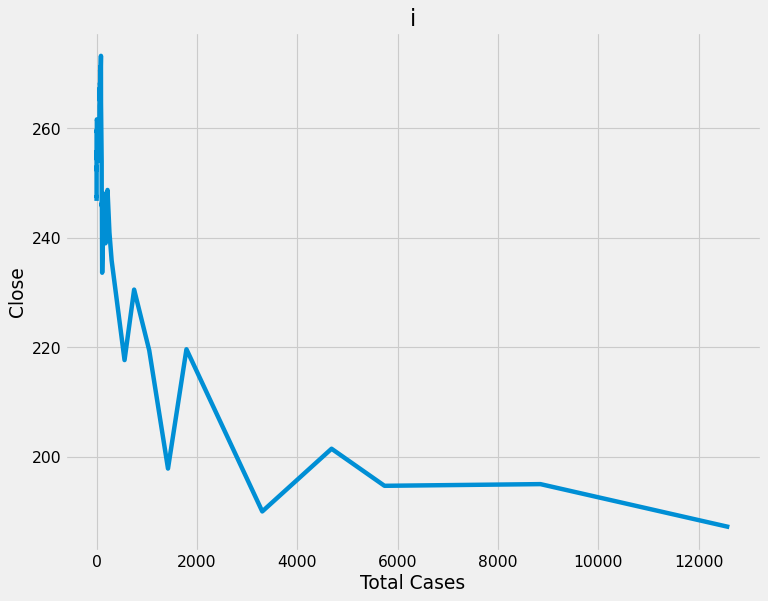

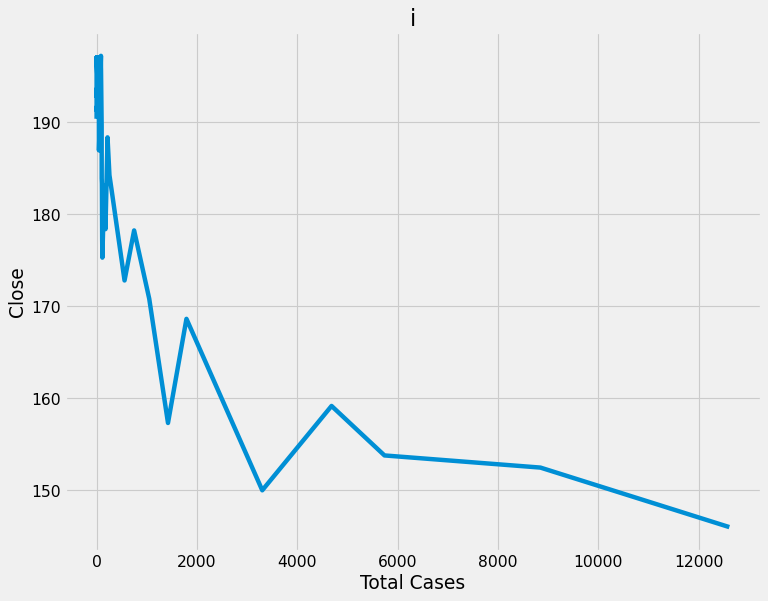

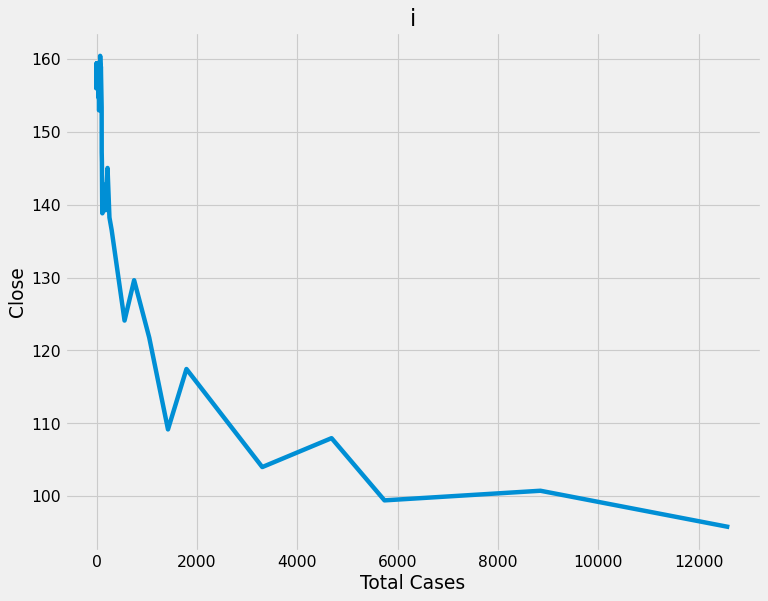

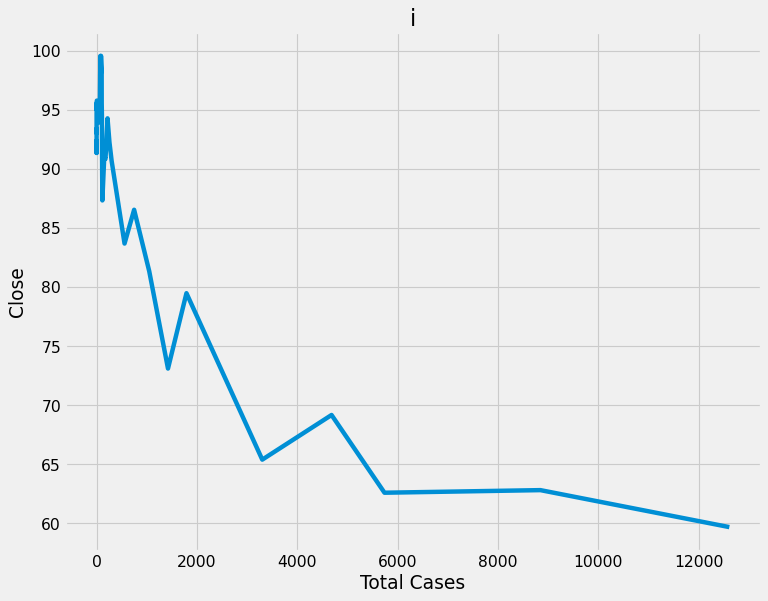

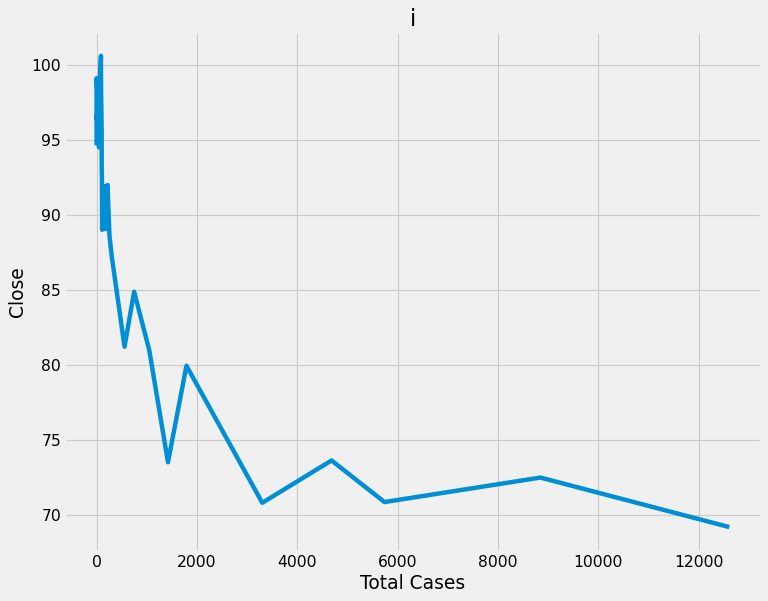

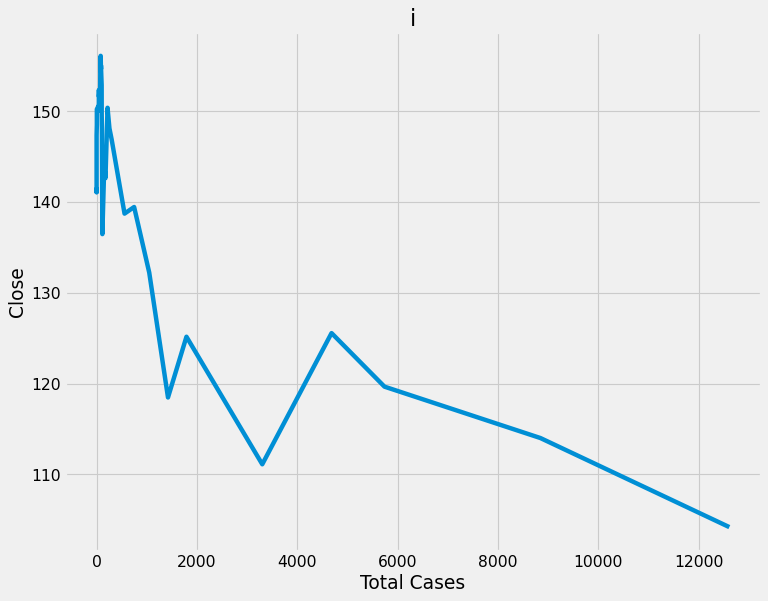

In [34]:
df_list = [cov_decl_mats, cov_decl_discretionary, 
        cov_decl_staples, cov_decl_energy, cov_decl_financials, 
        cov_decl_info_tech, cov_decl_health_care, cov_decl_industrial, 
        cov_decl_real_estate, cov_decl_communication, cov_decl_utility]

for i in df_list:
    x = i['Cumulative_cases']
    y = i['Close']
    name = f'{i=}'.split('=')[0]
    figure(figsize=(10, 8), dpi=80)
    plt.plot(x, y)
    plt.title(str(name))
    plt.xlabel('Total Cases')
    plt.ylabel('Close')
    plt.show()

Because this is appears to be a form of exponential decay we can create an optimized model that fits our data to a function that represents this. The function f(x) = a* e^(-b*x) + c most accurately represents our curve where c is the minimum value we expect to arrive at, b is our rate of decay, and a is the difference between our initial closing cost and the minimum.

We use curve_fit from the optimize package of the scipy library to optimize our model based on our data. 

In [35]:
from scipy.optimize import curve_fit
import numpy as np
#determine our X and Y values for each sector dataset
x_mats = cov_decl_mats['Cumulative_cases']
y_mats = cov_decl_mats['Close']
x_discretionary = cov_decl_discretionary['Cumulative_cases']
y_discretionary = cov_decl_discretionary['Close']
x_staples = cov_decl_staples['Cumulative_cases']
y_staples = cov_decl_staples['Close']
x_energy = cov_decl_energy['Cumulative_cases']
y_energy = cov_decl_energy['Close']
x_financials = cov_decl_financials['Cumulative_cases']
y_financials = cov_decl_financials['Close']
x_info_tech = cov_decl_info_tech['Cumulative_cases']
y_info_tech = cov_decl_info_tech['Close']
x_health_care = cov_decl_health_care['Cumulative_cases']
y_health_care = cov_decl_health_care['Close']
x_industrial = cov_decl_industrial['Cumulative_cases']
y_industrial = cov_decl_industrial['Close']
x_real_estate = cov_decl_real_estate['Cumulative_cases']
y_real_estate = cov_decl_real_estate['Close']
x_communication = cov_decl_communication['Cumulative_cases']
y_communication = cov_decl_communication['Close']
x_utility = cov_decl_utility['Cumulative_cases']
y_utility = cov_decl_utility['Close']


# y = a*e^(bx) + c
#define our function to fit to
def f(x, a, b, c):
	return a *np.exp(-b*x) +c

#apply curve fit to optimize our function to the dataset.
#apply bounds for each based on highest close
par_mats, cov_mats = curve_fit(f, x_mats, y_mats, bounds = (0, 140))
par_discretionary, cov_discretionary = curve_fit(f, x_discretionary, y_discretionary,bounds = (0, 210))
par_staples, cov_staples = curve_fit(f, x_staples, y_staples, bounds = (0, 180))
par_energy, cov_energy = curve_fit(f, x_energy, y_energy, bounds = (0, 100))
par_financials, cov_financials = curve_fit(f, x_financials, y_financials, bounds = (0, 100))
par_info_tech, cov_info_tech = curve_fit(f, x_info_tech, y_info_tech, bounds = (0, 280))
par_health_care, cov_health_care = curve_fit(f, x_health_care, y_health_care, bounds = (0, 200))
par_industrial, cov_industrial = curve_fit(f, x_industrial, y_industrial, bounds = (0, 170))
par_real_estate, cov_real_estate = curve_fit(f, x_real_estate, y_real_estate, bounds = (0, 100), maxfev=1500)
par_communication, cov_communication = curve_fit(f, x_communication, y_communication, bounds = (0, 110))
par_utility, cov_utility = curve_fit(f, x_utility, y_utility, bounds = (0, 160))

In [36]:
#print out our parameters for each function. [a, b, c]
#the highest b value will correspond to highest rate of decay. This indicates a fast drop off and steadier afterwards.
print('Materials: ', par_mats)
print('Discretionary: ', par_discretionary)
print('Staples: ', par_staples)
print('Energy: ', par_energy)
print('Financials: ', par_financials)
print('Info Tech:', par_info_tech)
print('Health Care: ', par_health_care)
print('Industrial: ', par_industrial)
print('Real Estate: ', par_real_estate)
print('Communication: ', par_communication)
print('Utility: ', par_utility)

Materials:  [4.23668686e+01 1.44555832e-03 8.92725705e+01]
Discretionary:  [6.53773218e+01 8.43071194e-04 1.30426004e+02]
Staples:  [2.74350584e+01 1.09126236e-03 1.35050006e+02]
Energy:  [4.33850458e+01 2.90579138e-03 3.65523593e+01]
Financials:  [2.89245520e+01 1.57375726e-03 4.84010277e+01]
Info Tech: [6.67812545e+01 9.92174889e-04 1.93586094e+02]
Health Care:  [4.15222891e+01 9.67411926e-04 1.52558622e+02]
Industrial:  [5.59506658e+01 1.25870335e-03 1.02486144e+02]
Real Estate:  [3.42803937e+01 4.83496674e-04 6.13088501e+01]
Communication:  [2.62856633e+01 1.23706983e-03 7.18054134e+01]
Utility:  [3.73967292e+01 5.47290374e-04 1.12155478e+02]


### Plot Function Against Data

<function matplotlib.pyplot.show(close=None, block=None)>

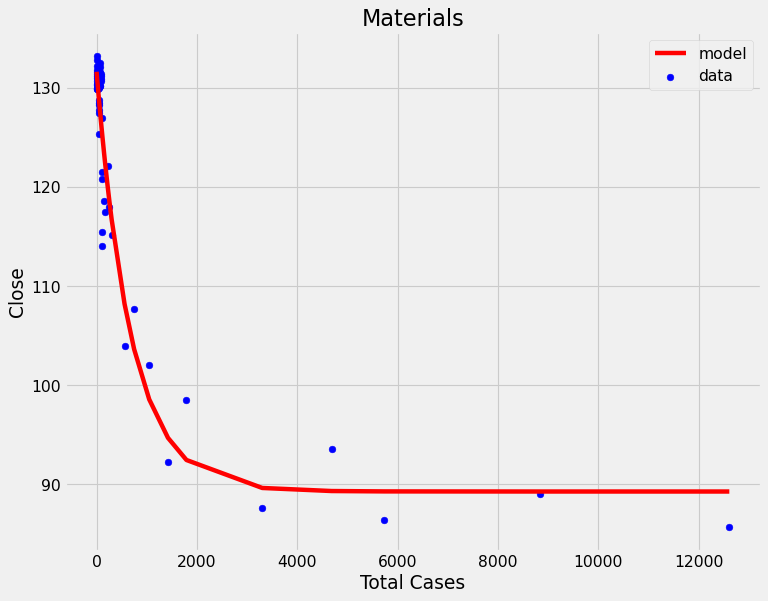

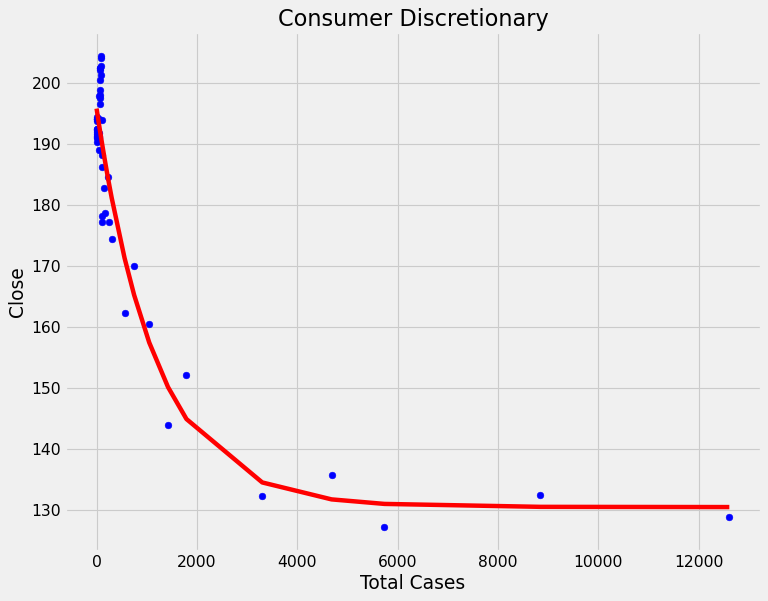

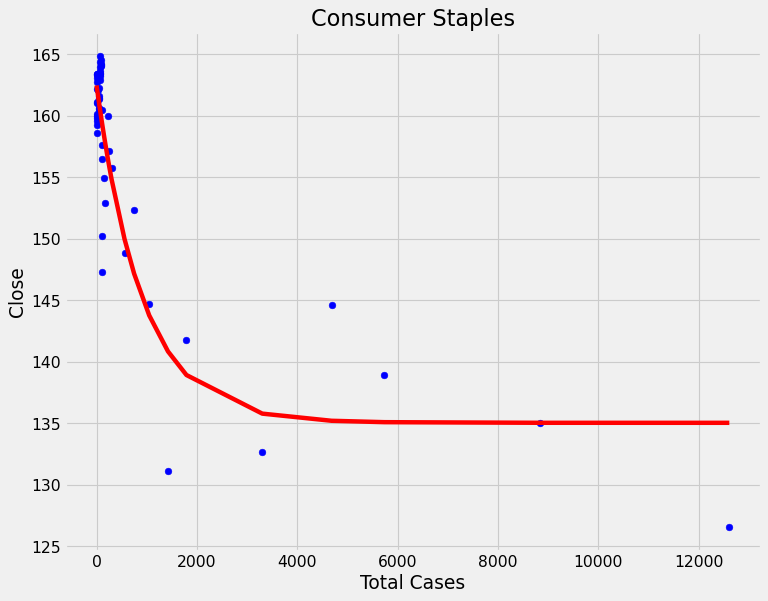

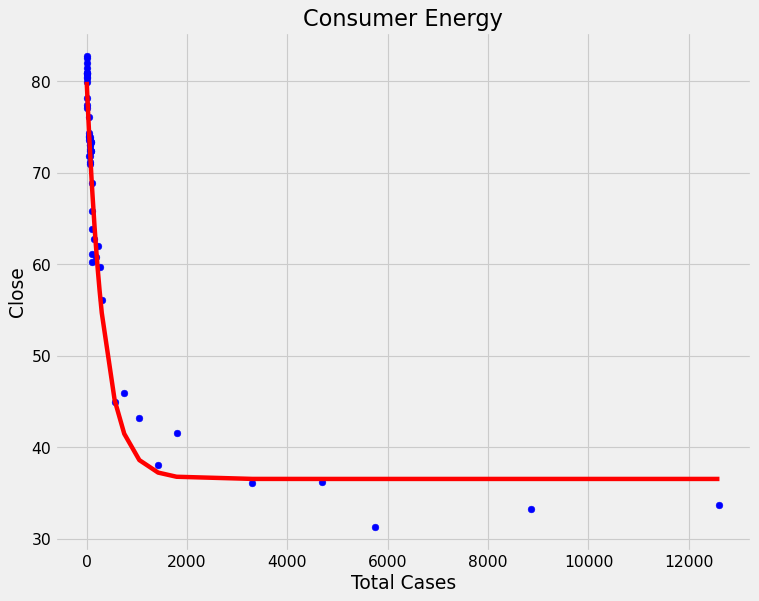

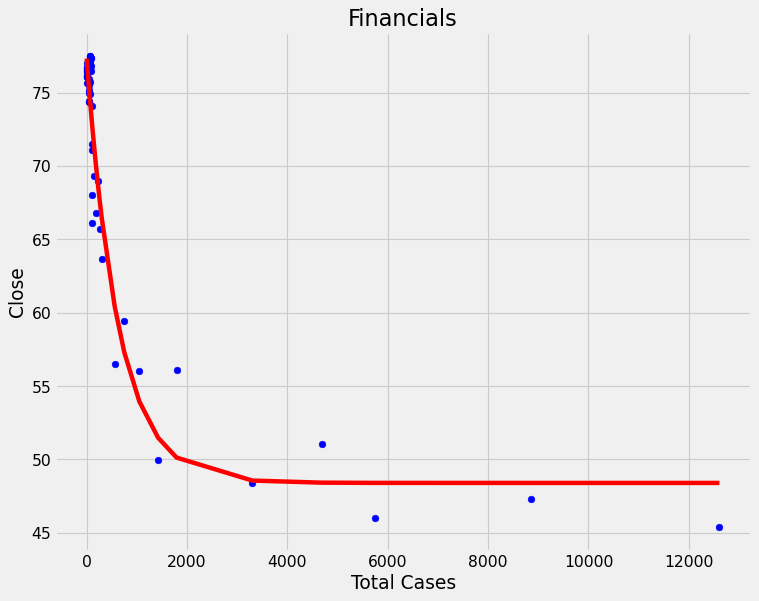

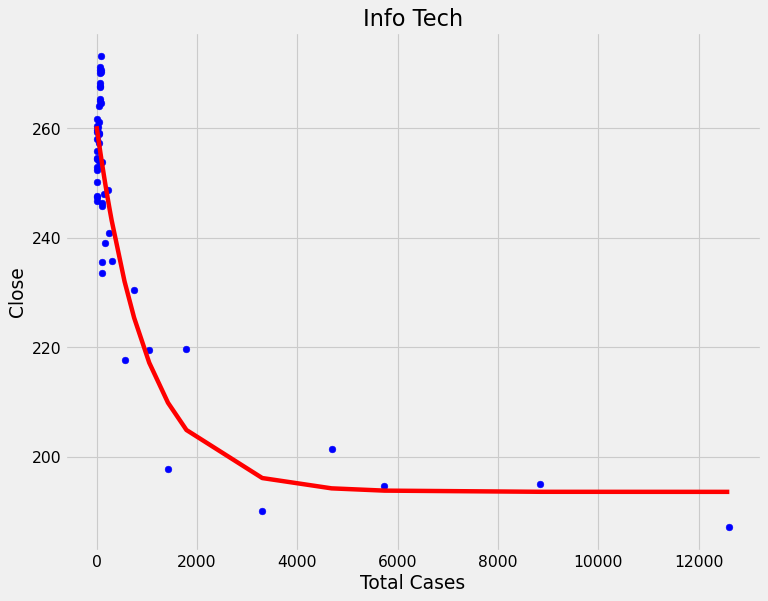

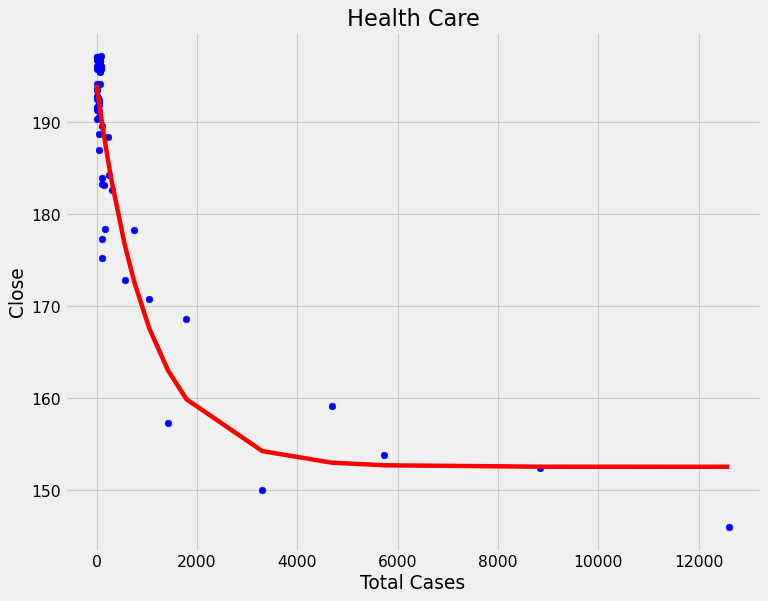

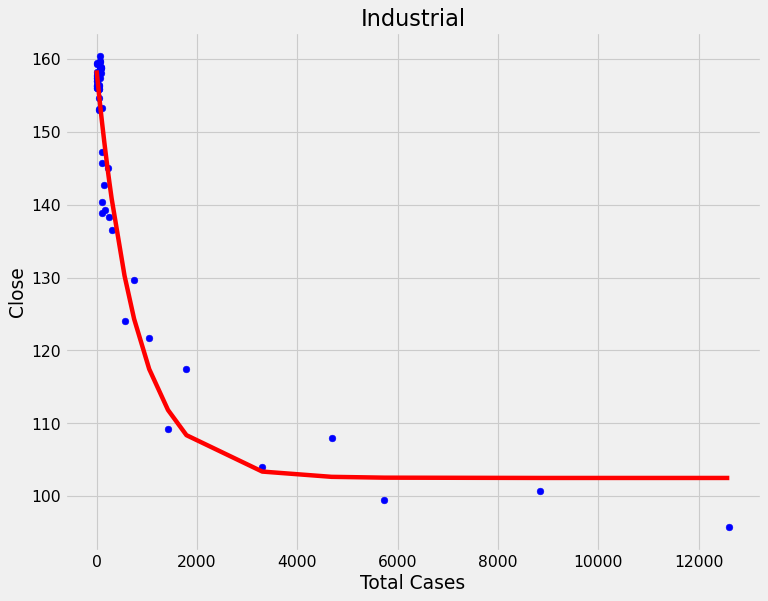

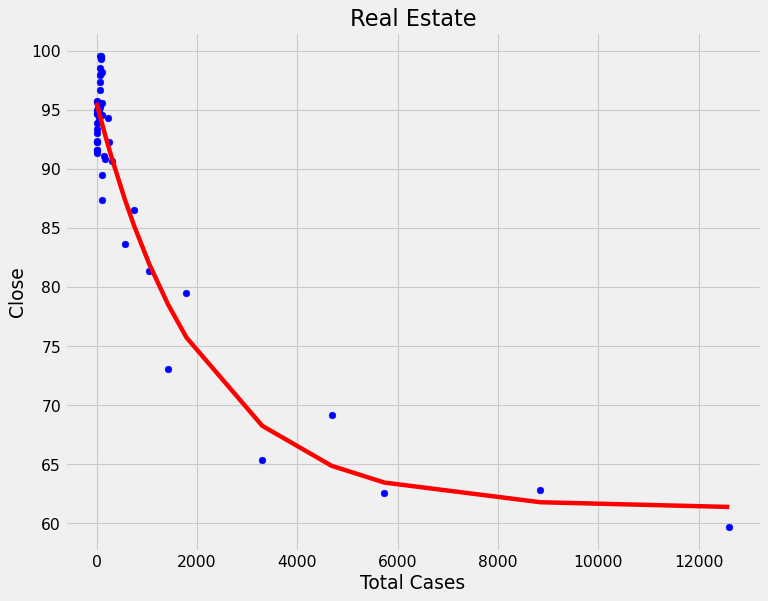

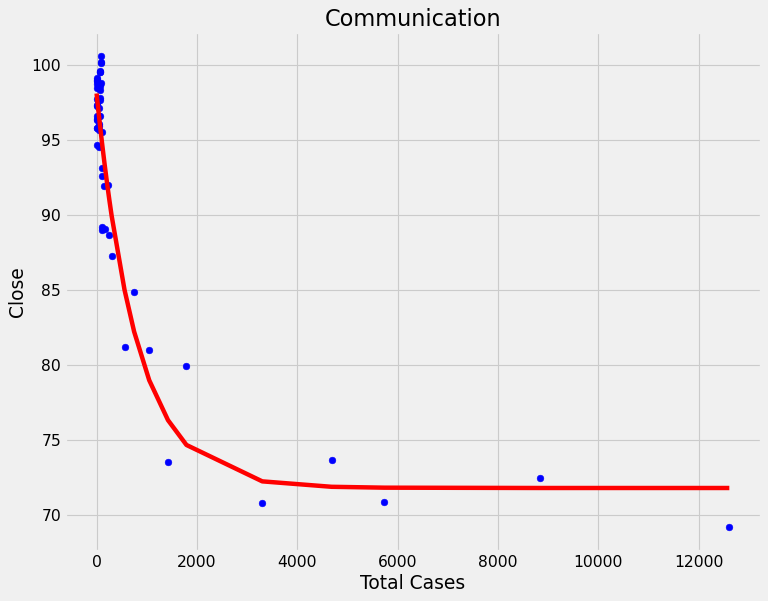

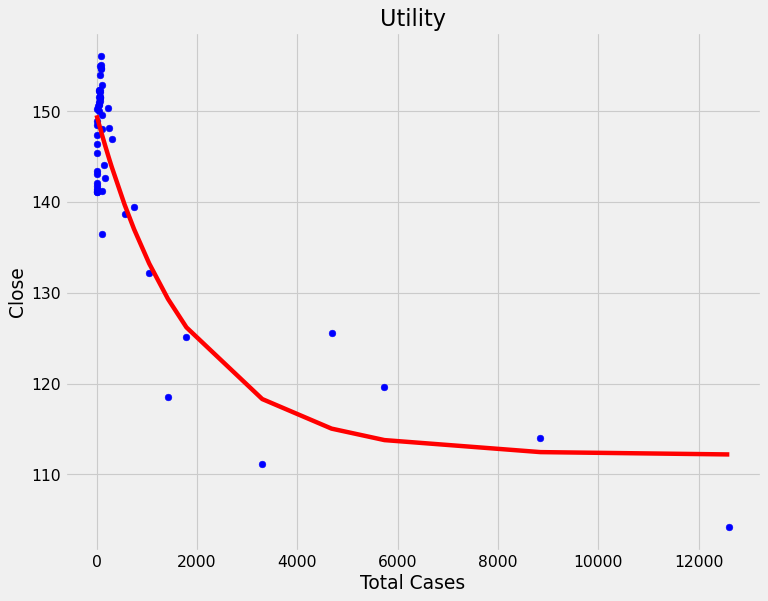

In [37]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_mats, y_mats, label='data', color = 'b')
plt.plot(x_mats, f(x_mats,par_mats[0], par_mats[1], par_mats[2]), label='model', color = 'r')
plt.title('Materials')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.legend()
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_discretionary, y_discretionary, label='data', color = 'b')
plt.plot(x_discretionary, f(x_discretionary,par_discretionary[0], par_discretionary[1], par_discretionary[2]), label='model', color = 'r')
plt.title('Consumer Discretionary')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_staples, y_staples, label='data', color = 'b')
plt.plot(x_staples, f(x_staples,par_staples[0], par_staples[1], par_staples[2]), label='model', color = 'r')
plt.title('Consumer Staples')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_energy, y_energy, label='data', color = 'b')
plt.plot(x_energy, f(x_energy,par_energy[0], par_energy[1], par_energy[2]), label='model', color = 'r')
plt.title('Consumer Energy')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_financials, y_financials, label='data', color = 'b')
plt.plot(x_financials, f(x_financials,par_financials[0], par_financials[1], par_financials[2]), label='model', color = 'r')
plt.title('Financials')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_info_tech, y_info_tech, label='data', color = 'b')
plt.plot(x_info_tech, f(x_info_tech,par_info_tech[0], par_info_tech[1], par_info_tech[2]), label='model', color = 'r')
plt.title('Info Tech')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_health_care, y_health_care, label='data', color = 'b')
plt.plot(x_health_care, f(x_health_care,par_health_care[0], par_health_care[1], par_health_care[2]), label='model', color = 'r')
plt.title('Health Care')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_industrial, y_industrial, label='data', color = 'b')
plt.plot(x_industrial, f(x_industrial,par_industrial[0], par_industrial[1], par_industrial[2]), label='model', color = 'r')
plt.title('Industrial')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_real_estate, y_real_estate, label='data', color = 'b')
plt.plot(x_real_estate, f(x_real_estate,par_real_estate[0], par_real_estate[1], par_real_estate[2]), label='model', color = 'r')
plt.title('Real Estate')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_communication, y_communication, label='data', color = 'b')
plt.plot(x_communication, f(x_communication,par_communication[0], par_communication[1], par_communication[2]), label='model', color = 'r')
plt.title('Communication')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

figure(figsize=(10, 8), dpi=80)
plt.scatter(x_utility, y_utility, label='data', color = 'b')
plt.plot(x_utility, f(x_utility,par_utility[0], par_utility[1], par_utility[2]), label='model', color = 'r')
plt.title('Utility')
plt.xlabel('Total Cases')
plt.ylabel('Close')
plt.show

### Errors

In [38]:
errors = []
sse_mats = np.sum(np.square(f(x,par_mats[0], par_mats[1], par_mats[2]) - y))
errors.append(sse_mats)
sse_discretionary = np.sum(np.square(f(x,par_discretionary[0], par_discretionary[1], par_discretionary[2]) - y))
errors.append(sse_discretionary)
sse_staples = np.sum(np.square(f(x,par_staples[0], par_staples[1], par_staples[2]) - y))
errors.append(sse_staples)

sse_energy = np.sum(np.square(f(x,par_energy[0], par_energy[1], par_energy[2]) - y))
errors.append(sse_energy)

sse_financials = np.sum(np.square(f(x,par_financials[0], par_financials[1], par_financials[2]) - y))
errors.append(sse_financials)

sse_info_tech = np.sum(np.square(f(x,par_info_tech[0], par_info_tech[1], par_info_tech[2]) - y))
errors.append(sse_info_tech)

sse_health_care = np.sum(np.square(f(x,par_health_care[0], par_health_care[1], par_health_care[2]) - y))
errors.append(sse_health_care)

sse_industrial = np.sum(np.square(f(x,par_industrial[0], par_industrial[1], par_industrial[2]) - y))
errors.append(sse_industrial)

sse_communication = np.sum(np.square(f(x,par_communication[0], par_communication[1], par_communication[2]) - y))
errors.append(sse_communication)

sse_utility = np.sum(np.square(f(x,par_utility[0], par_utility[1], par_utility[2]) - y))
errors.append(sse_utility)

In [39]:
errors

[28847.062336983392,
 92023.52498905931,
 11194.0656513478,
 326392.003213891,
 292893.4262140198,
 583241.9125025226,
 97895.46987722022,
 5390.620116329876,
 144682.15800163135,
 1581.4637088935087]

Note that we expect relatively high error values for this model, as there is a great deal of volatility in day to day stock prices. In general we can see from the plots that our model does follow the general trend of the markets. One thing to note is that our each model consistently predicts the stock price to drop to a value above what actually occurs at the lowest point.

Another notable thing is that the minimum stock price occurs for each sector at approximately 12000 total cases. 

## Time Series Analysis for Covid_Materials

In order to perform time series analysis, we need to check if the data is stationary or not. Hence, we performed the ADF (Augmented Dickey-Fuller) test which is used to determine the presence of unit root in the series and help us undertstand the stationarity of the series. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a 1),                                                              Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this. The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

<ipython-input-40-be06ee22a2ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_materials['close_rol' ] = df_materials["Close"].rolling(7).mean()
<ipython-input-40-be06ee22a2ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_materials['close_std'] = df_materials["Close"].rolling(7).std()


<AxesSubplot:xlabel='Date', ylabel='close_rol'>

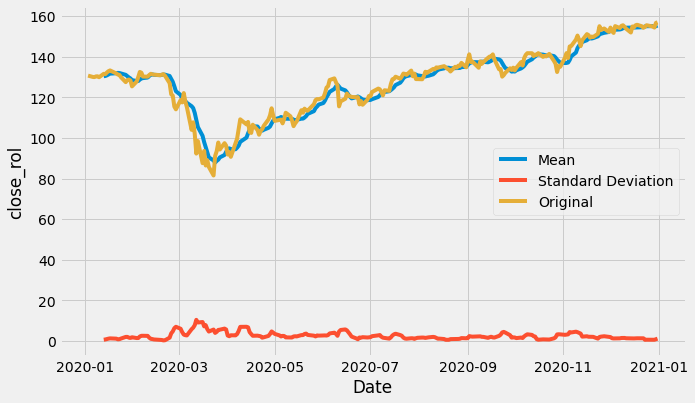

In [40]:
df_materials = covid_materials[['Date','Close']]
close_m = df_materials["Close"]
date_m = df_materials["Date"]

df_materials['close_rol' ] = df_materials["Close"].rolling(7).mean()
df_materials['close_std'] = df_materials["Close"].rolling(7).std()
sns.lineplot(x = date_m, y = "close_rol", data = df_materials, label = 'Mean')
sns.lineplot(x = date_m, y = "close_std", data = df_materials, label = 'Standard Deviation')
sns.lineplot(x = date_m, y = close_m, data = df_materials, label = 'Original')

In [41]:
print("Results")
adft = adfuller(close_m,autolag='AIC')
#Manually writing what values does it explain
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

Results
Test Statistics                 -0.777992
p-value                          0.825502
No. of lags used                 9.000000
Number of observations used    242.000000
critical value (1%)             -3.457664
critical value (5%)             -2.873559
critical value (10%)            -2.573175
dtype: float64


### Multiplicative Decomposition

As seen from above the p-value is greater than 0.05 therefore we cannot reject the Null hypothesis. We can also notice that the test statistics is greater than the critical values. Hence, the data is non-stationary.
In order to perform time series analysis, we need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

/Users/joshlister/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<Figure size 720x432 with 0 Axes>

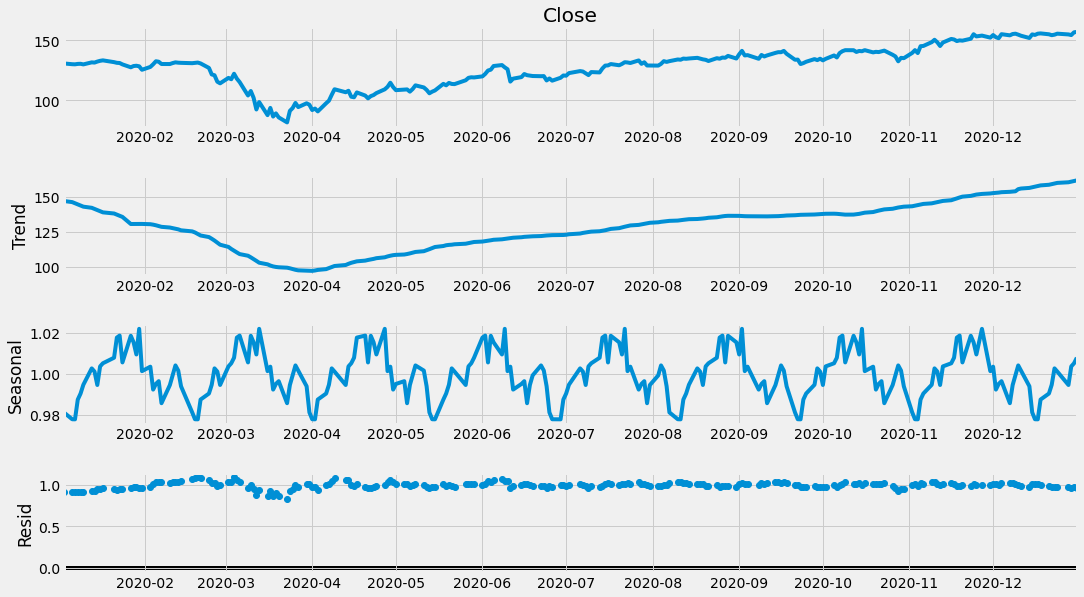

In [42]:
df_materials.rename(index=date_m, inplace=True)
result = seasonal_decompose(df_materials['Close'], model='multiplicative',  extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()   
fig.set_size_inches(16, 9)

In order to reduce the magnitude of the values and reduce the rising trend in the series, we take the log of the series. After that we find the rolling average of the series.
The rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


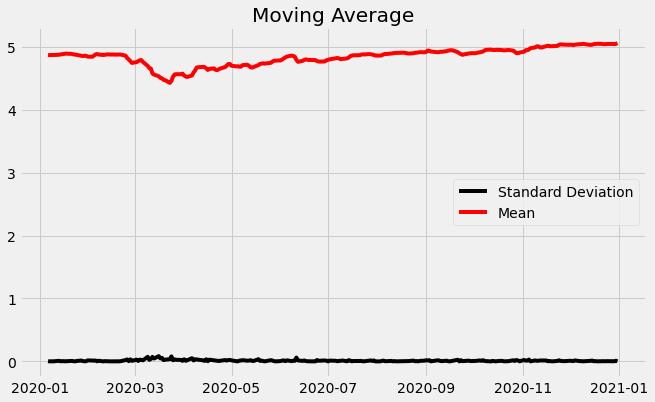

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_materials["Close"])
moving_avg = df_log.rolling(2).mean()
std_dev = df_log.rolling(2).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### ARIMA Model

ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

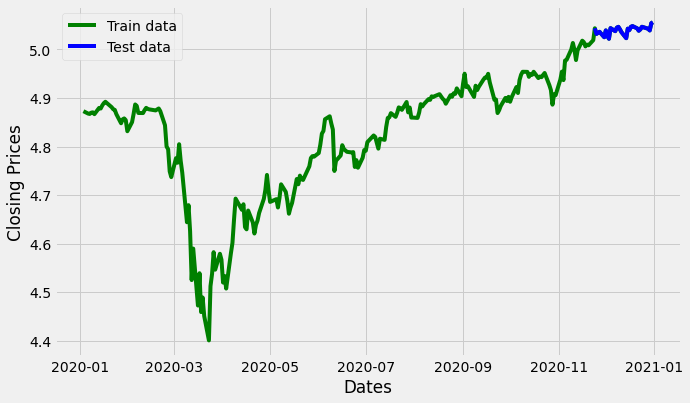

In [44]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Auto ARIMA: Automatically discovers the optimal order for an ARIMA model.
The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. 

In [45]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adf test to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let the model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-983.506, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-990.767, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-987.849, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-985.359, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-999.409, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-997.719, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-997.519, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-993.114, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1016.650, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1023.936, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-999.819, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-995.839, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-997.524, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-1025.842, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0]       

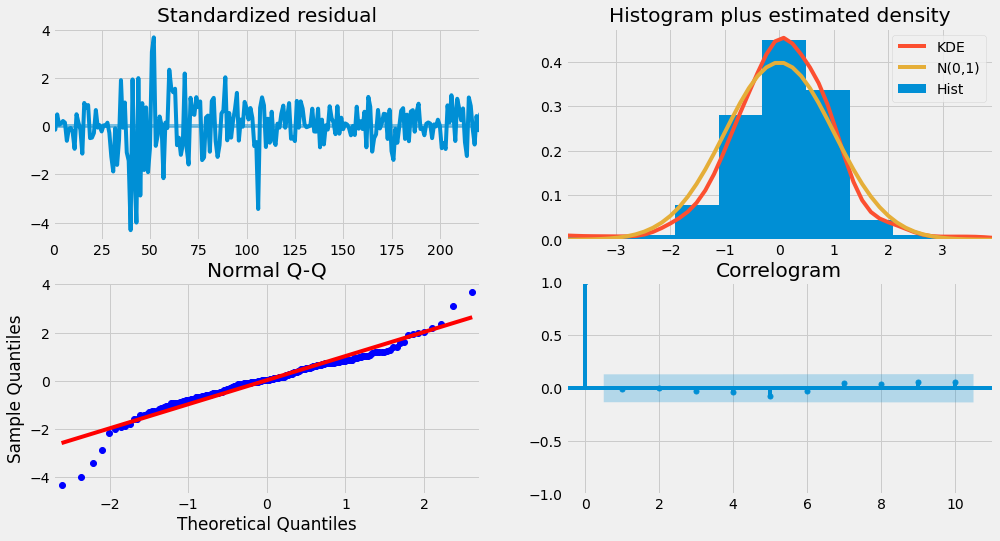

In [46]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram (ACF plot) shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model.

In [47]:
# Creating an ARIMA model with provided optimal parameters p, d and q.
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/Users/joshlister/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/joshlister/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, 

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  222
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 519.170
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 26 Aug 2021   AIC                          -1024.339
Time:                        18:15:56   BIC                          -1000.520
Sample:                             1   HQIC                         -1014.723
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.002      0.387      0.698      -0.003       0.004
ar.L1.D.Close    -1.3895      0.138    -10.086      0.000      -1.660      -1.120
ar.L2.D.Close    -0.3487      0.195     

/Users/joshlister/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


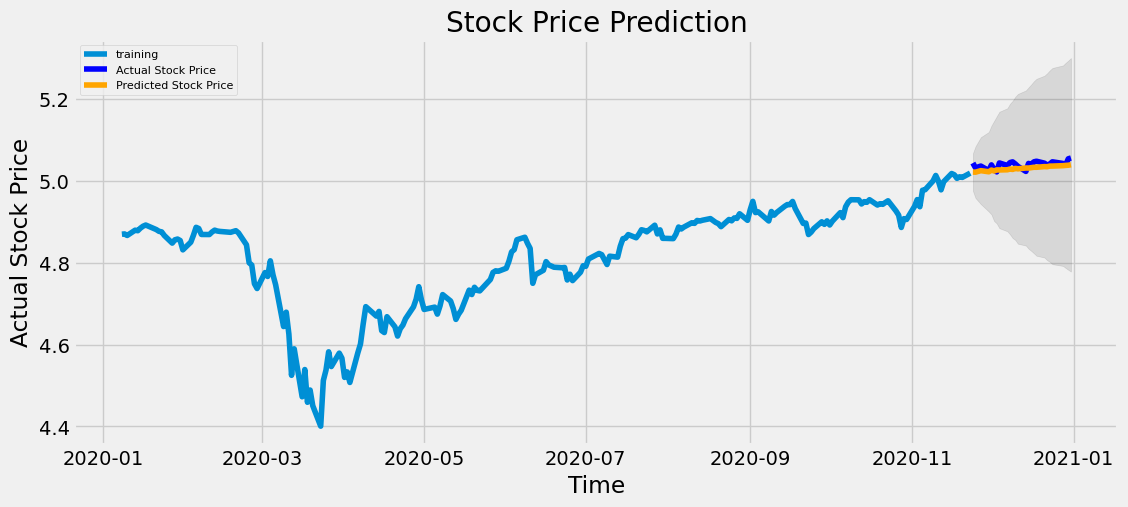

In [48]:
# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [49]:
# Report performance
MSE = mean_squared_error(test_data, fc)
print('MSE: '+str(MSE))
MAE = mean_absolute_error(test_data, fc)
print('MAE: '+str(MAE))
RMSE = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(RMSE))
MAPE = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(MAPE))

MSE: 0.0001347284983443123
MAE: 0.010329148481896384
RMSE: 0.011607260587421663
MAPE: 0.0020483484774979576
